Problem: Recently, the hospital has seen a spike in readmission rates, leading to increased healthcare costs and indicating potential quality of care issues. The administration is concerned about the impact on patient outcomes and the hospital's reputation. The task is to analyze hospital admission data to identify patterns and factors associated with high readmission rates.

### Importing libraries and Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as ps
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

df = pd.read_csv("D:\Datatset_for_project\Hospital_readmission_project\HA_Data\HA_data_raw.csv")

df

index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754                ?  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

      weight  time_in_hospital medical_specialty  num_lab_procedures  ...  \
0          ?                 4  Emergency/Trauma                  39  ...   
1          ?                 3  Emergency/Trauma                  34  ...   
2          ?                 6        Nephrology                  50  ...   
3          ?                 5                 ?                  63  ...   
4          ?                 9        Psychiatry                  17  ...   
...      ...               ...               ...                 ...  ...   
66582      ?                11  InternalMedicine                  40  ...   
66583      ?                 4                 ?                  39  ...   
66584      ?                 2                 ?                  24  ...   
66585      ?                 4  InternalMedicine                  39  ...   
66586      ?                 2                 ?                  38  ...   

       citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0               No       No                   No                   No   
1               No       No                   No                   No   
2               No     Down                   No                   No   
3               No     Down                   No                   No   
4               No       No                   No                   No   
...            ...      ...                  ...                  ...   
66582           No   Steady                   No                   No   
66583           No       No                   No                   No   
66584           No       No                   No                   No   
66585           No       No                   No                   No   
66586           No   Steady                   No                   No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
66582                        No                      No   
66583                        No                      No   
66584                        No                      No   
66585                        No                      No   
66586                        No                      No   

      metformin-pioglitazone change diabetesMed  readmitted  
0                         No     No         Yes           1  
1                         No     No          No           0  
2                         No     Ch         Yes           1  
3                         No     Ch         Yes           1  
4                         No     No          No           1  
...                      ...    ...         ...         ...  
66582                     No     No         Yes           0  
66583                     No     No          No           1  
66584                    

In [2]:
df_staged = df

df_staged

index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754                ?  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

      weight  time_in_hospital medical_specialty  num_lab_procedures  ...  \
0          ?                 4  Emergency/Trauma                  39  ...   
1          ?                 3  Emergency/Trauma                  34  ...   
2          ?                 6        Nephrology                  50  ...   
3          ?                 5                 ?                  63  ...   
4          ?                 9        Psychiatry                  17  ...   
...      ...               ...               ...                 ...  ...   
66582      ?                11  InternalMedicine                  40  ...   
66583      ?                 4                 ?                  39  ...   
66584      ?                 2                 ?                  24  ...   
66585      ?                 4  InternalMedicine                  39  ...   
66586      ?                 2                 ?                  38  ...   

       citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0               No       No                   No                   No   
1               No       No                   No                   No   
2               No     Down                   No                   No   
3               No     Down                   No                   No   
4               No       No                   No                   No   
...            ...      ...                  ...                  ...   
66582           No   Steady                   No                   No   
66583           No       No                   No                   No   
66584           No       No                   No                   No   
66585           No       No                   No                   No   
66586           No   Steady                   No                   No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
66582                        No                      No   
66583                        No                      No   
66584                        No                      No   
66585                        No                      No   
66586                        No                      No   

      metformin-pioglitazone change diabetesMed  readmitted  
0                         No     No         Yes           1  
1                         No     No          No           0  
2                         No     Ch         Yes           1  
3                         No     Ch         Yes           1  
4                         No     No          No           1  
...                      ...    ...         ...         ...  
66582                     No     No         Yes           0  
66583                     No     No          No           1  
66584                    

### Data Exploration

#### Brief look into the dataset

In [3]:
df_staged.head()

index  encounter_id  patient_id             race  gender      age weight  \
0  69375     197029140    51521940         Hispanic    Male  [80-90)      ?   
1  57272     163571946    92631357        Caucasian    Male  [60-70)      ?   
2  82347     256497366    30023982        Caucasian  Female  [50-60)      ?   
3  89608     289891212    93606021  AfricanAmerican  Female  [70-80)      ?   
4  24091      81873900    23464296        Caucasian    Male  [70-80)      ?   

   time_in_hospital medical_specialty  num_lab_procedures  ...  citoglipton  \
0                 4  Emergency/Trauma                  39  ...           No   
1                 3  Emergency/Trauma                  34  ...           No   
2                 6        Nephrology                  50  ...           No   
3                 5                 ?                  63  ...           No   
4                 9        Psychiatry                  17  ...           No   

   insulin  glyburide-metformin  glipizide-metformin  \
0       No                   No                   No   
1       No                   No                   No   
2     Down                   No                   No   
3     Down                   No                   No   
4       No                   No                   No   

   glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                        No                      No                     No   
1                        No                      No                     No   
2                        No                      No                     No   
3                        No                      No                     No   
4                        No                      No                     No   

  change diabetesMed  readmitted  
0     No         Yes           1  
1     No          No           0  
2     Ch         Yes           1  
3     Ch         Yes           1  
4     No          No           1  

[5 rows x 49 columns]

In [4]:
df_staged.tail()

index  encounter_id  patient_id       race  gender      age weight  \
66582  39934     124202466    23450508  Caucasian  Female  [70-80)      ?   
66583  47366     145667070    29324601  Caucasian    Male  [80-90)      ?   
66584  76555     231061116     2179062  Caucasian  Female  [60-70)      ?   
66585  25392      84911682    20531754          ?  Female  [80-90)      ?   
66586  51312     153167502    81985473  Caucasian  Female  [80-90)      ?   

       time_in_hospital medical_specialty  num_lab_procedures  ...  \
66582                11  InternalMedicine                  40  ...   
66583                 4                 ?                  39  ...   
66584                 2                 ?                  24  ...   
66585                 4  InternalMedicine                  39  ...   
66586                 2                 ?                  38  ...   

       citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
66582           No   Steady                   No                   No   
66583           No       No                   No                   No   
66584           No       No                   No                   No   
66585           No       No                   No                   No   
66586           No   Steady                   No                   No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
66582                        No                      No   
66583                        No                      No   
66584                        No                      No   
66585                        No                      No   
66586                        No                      No   

      metformin-pioglitazone change diabetesMed  readmitted  
66582                     No     No         Yes           0  
66583                     No     No          No           1  
66584                     No     No         Yes           1  
66585                     No     No          No           0  
66586                     No     Ch         Yes           1  

[5 rows x 49 columns]

In [5]:
df_staged.shape

(66587, 49)

In [6]:
df_staged.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df_staged.isnull().sum()

index                           0
encounter_id                    0
patient_id                      0
race                            0
gender                          0
age                             0
weight                          0
time_in_hospital                0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
diag_4                          0
diag_5                          0
number_diagnoses                0
max_glu_serum               63104
A1Cresult                   55451
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [8]:
# looking for any missing data in the above dataframe:

for col in df_staged.columns:
    nulldata = np.mean(df_staged[col].isnull())
    print('{} = {}%'.format(col, nulldata))

index = 0.0%
encounter_id = 0.0%
patient_id = 0.0%
race = 0.0%
gender = 0.0%
age = 0.0%
weight = 0.0%
time_in_hospital = 0.0%
medical_specialty = 0.0%
num_lab_procedures = 0.0%
num_procedures = 0.0%
num_medications = 0.0%
number_outpatient = 0.0%
number_emergency = 0.0%
number_inpatient = 0.0%
diag_1 = 0.0%
diag_2 = 0.0%
diag_3 = 0.0%
diag_4 = 0.0%
diag_5 = 0.0%
number_diagnoses = 0.0%
max_glu_serum = 0.9476924925285717%
A1Cresult = 0.8327601483773109%
metformin = 0.0%
repaglinide = 0.0%
nateglinide = 0.0%
chlorpropamide = 0.0%
glimepiride = 0.0%
acetohexamide = 0.0%
glipizide = 0.0%
glyburide = 0.0%
tolbutamide = 0.0%
pioglitazone = 0.0%
rosiglitazone = 0.0%
acarbose = 0.0%
miglitol = 0.0%
troglitazone = 0.0%
tolazamide = 0.0%
examide = 0.0%
citoglipton = 0.0%
insulin = 0.0%
glyburide-metformin = 0.0%
glipizide-metformin = 0.0%
glimepiride-pioglitazone = 0.0%
metformin-rosiglitazone = 0.0%
metformin-pioglitazone = 0.0%
change = 0.0%
diabetesMed = 0.0%
readmitted = 0.0%


In [9]:
df_staged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     66587 non-null  int64  
 1   encounter_id              66587 non-null  int64  
 2   patient_id                66587 non-null  int64  
 3   race                      66587 non-null  object 
 4   gender                    66587 non-null  object 
 5   age                       66587 non-null  object 
 6   weight                    66587 non-null  object 
 7   time_in_hospital          66587 non-null  int64  
 8   medical_specialty         66587 non-null  object 
 9   num_lab_procedures        66587 non-null  int64  
 10  num_procedures            66587 non-null  int64  
 11  num_medications           66587 non-null  int64  
 12  number_outpatient         66587 non-null  int64  
 13  number_emergency          66587 non-null  int64  
 14  number

In [10]:
df_staged.dtypes

index                         int64
encounter_id                  int64
patient_id                    int64
race                         object
gender                       object
age                          object
weight                       object
time_in_hospital              int64
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
diag_4                       object
diag_5                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

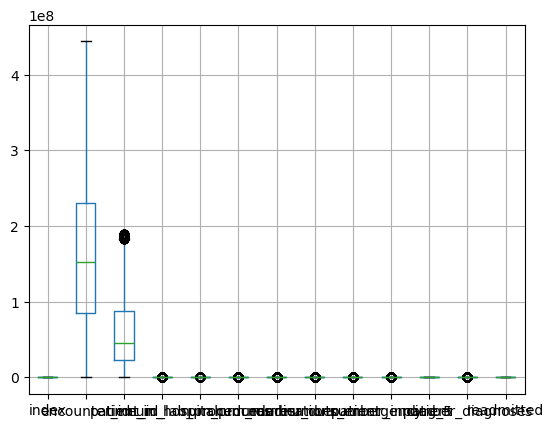

In [11]:
#Looking for Outliers:

df_staged.boxplot()
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 9)
plt.show()

### Data Cleaning

#### Replacing Empty/Null Values

In [12]:
df_staged['weight'] = df_staged['weight'].replace('?', 'not disclosed')

df_staged['weight'].unique()

array(['not disclosed', '[0-25)', '[75-100)', '[50-75)', '[25-50)',
       '[125-150)', '[150-175)', '[100-125)', '>200', '[175-200)'],
      dtype=object)

In [13]:
df_staged['max_glu_serum'].unique()

array([nan, '>200', 'Norm', '>300'], dtype=object)

In [14]:
df_staged['max_glu_serum'] = df_staged['max_glu_serum'].fillna('not disclosed')
df_staged.groupby('max_glu_serum').count()

index  encounter_id  patient_id   race  gender    age  weight  \
max_glu_serum                                                                  
>200             991           991         991    991     991    991     991   
>300             849           849         849    849     849    849     849   
Norm            1643          1643        1643   1643    1643   1643    1643   
not disclosed  63104         63104       63104  63104   63104  63104   63104   

               time_in_hospital  medical_specialty  num_lab_procedures  ...  \
max_glu_serum                                                           ...   
>200                        991                991                 991  ...   
>300                        849                849                 849  ...   
Norm                       1643               1643                1643  ...   
not disclosed             63104              63104               63104  ...   

               citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
max_glu_serum                                                                   
>200                   991      991                  991                  991   
>300                   849      849                  849                  849   
Norm                  1643     1643                 1643                 1643   
not disclosed        63104    63104                63104                63104   

               glimepiride-pioglitazone  metformin-rosiglitazone  \
max_glu_serum                                                      
>200                                991                      991   
>300                                849                      849   
Norm                               1643                     1643   
not disclosed                     63104                    63104   

               metformin-pioglitazone  change  diabetesMed  readmitted  
max_glu_serum                                                           
>200                              991     991          991         991  
>300                              849     849          849         849  
Norm                             1643    1643         1643        1643  
not disclosed                   63104   63104        63104       63104  

[4 rows x 48 columns]

In [15]:
df_staged['A1Cresult'].unique()

array([nan, 'Norm', '>8', '>7'], dtype=object)

In [16]:
df_staged['A1Cresult'] = df_staged['A1Cresult'].fillna('not disclosed')
df_staged.groupby('A1Cresult').count()

index  encounter_id  patient_id   race  gender    age  weight  \
A1Cresult                                                                      
>7              2548          2548        2548   2548    2548   2548    2548   
>8              5342          5342        5342   5342    5342   5342    5342   
Norm            3246          3246        3246   3246    3246   3246    3246   
not disclosed  55451         55451       55451  55451   55451  55451   55451   

               time_in_hospital  medical_specialty  num_lab_procedures  ...  \
A1Cresult                                                               ...   
>7                         2548               2548                2548  ...   
>8                         5342               5342                5342  ...   
Norm                       3246               3246                3246  ...   
not disclosed             55451              55451               55451  ...   

               citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
A1Cresult                                                                       
>7                    2548     2548                 2548                 2548   
>8                    5342     5342                 5342                 5342   
Norm                  3246     3246                 3246                 3246   
not disclosed        55451    55451                55451                55451   

               glimepiride-pioglitazone  metformin-rosiglitazone  \
A1Cresult                                                          
>7                                 2548                     2548   
>8                                 5342                     5342   
Norm                               3246                     3246   
not disclosed                     55451                    55451   

               metformin-pioglitazone  change  diabetesMed  readmitted  
A1Cresult                                                               
>7                               2548    2548         2548        2548  
>8                               5342    5342         5342        5342  
Norm                             3246    3246         3246        3246  
not disclosed                   55451   55451        55451       55451  

[4 rows x 48 columns]

In [17]:
df_staged['gender'].unique()

array(['Male', 'Female', 'Unknown/Invalid'], dtype=object)

In [18]:
df_staged['gender'] = df_staged['gender'].replace('Unknown/Invalid', 'not disclosed')

df_staged['gender'].unique()
df_staged.groupby('gender').count()

index  encounter_id  patient_id   race    age  weight  \
gender                                                                 
Female         35973         35973       35973  35973  35973   35973   
Male           30612         30612       30612  30612  30612   30612   
not disclosed      2             2           2      2      2       2   

               time_in_hospital  medical_specialty  num_lab_procedures  \
gender                                                                   
Female                    35973              35973               35973   
Male                      30612              30612               30612   
not disclosed                 2                  2                   2   

               num_procedures  ...  citoglipton  insulin  glyburide-metformin  \
gender                         ...                                              
Female                  35973  ...        35973    35973                35973   
Male                    30612  ...        30612    30612                30612   
not disclosed               2  ...            2        2                    2   

               glipizide-metformin  glimepiride-pioglitazone  \
gender                                                         
Female                       35973                     35973   
Male                         30612                     30612   
not disclosed                    2                         2   

               metformin-rosiglitazone  metformin-pioglitazone  change  \
gender                                                                   
Female                           35973                   35973   35973   
Male                             30612                   30612   30612   
not disclosed                        2                       2       2   

               diabetesMed  readmitted  
gender                                  
Female               35973       35973  
Male                 30612       30612  
not disclosed            2           2  

[3 rows x 48 columns]

In [19]:
df_staged['race'].unique()

array(['Hispanic', 'Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian'],
      dtype=object)

In [20]:
df_staged['race'] = df_staged['race'].replace('?', 'Other')

df_staged['race'].unique()

array(['Hispanic', 'Caucasian', 'AfricanAmerican', 'Other', 'Asian'],
      dtype=object)

In [21]:
df_staged['medical_specialty'] = df_staged['medical_specialty'].replace('?', 'Other')
df_staged['medical_specialty'].value_counts()

medical_specialty
Other                             32672
InternalMedicine                   9460
Emergency/Trauma                   4986
Family/GeneralPractice             4924
Cardiology                         3434
                                  ...  
Pediatrics-EmergencyMedicine          2
Proctology                            1
Psychiatry-Addictive                  1
DCPTEAM                               1
Pediatrics-Hematology-Oncology        1
Name: count, Length: 65, dtype: int64

#### Dropping Unnecessary columns:

##### There are four columns in this dataset without any data points, those columns cannot be used any further analysis. Hence dropping those columns.

In [22]:
df_staged = df_staged.drop(['acetohexamide','examide','citoglipton','metformin-pioglitazone'], axis=1)

df_staged

index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754            Other  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

              weight  time_in_hospital medical_specialty  num_lab_procedures  \
0      not disclosed                 4  Emergency/Trauma                  39   
1      not disclosed                 3  Emergency/Trauma                  34   
2      not disclosed                 6        Nephrology                  50   
3      not disclosed                 5             Other                  63   
4      not disclosed                 9        Psychiatry                  17   
...              ...               ...               ...                 ...   
66582  not disclosed                11  InternalMedicine                  40   
66583  not disclosed                 4             Other                  39   
66584  not disclosed                 2             Other                  24   
66585  not disclosed                 4  InternalMedicine                  39   
66586  not disclosed                 2             Other                  38   

       ...  troglitazone  tolazamide  insulin  glyburide-metformin  \
0      ...            No          No       No                   No   
1      ...            No          No       No                   No   
2      ...            No          No     Down                   No   
3      ...            No          No     Down                   No   
4      ...            No          No       No                   No   
...    ...           ...         ...      ...                  ...   
66582  ...            No          No   Steady                   No   
66583  ...            No          No       No                   No   
66584  ...            No          No       No                   No   
66585  ...            No          No       No                   No   
66586  ...            No          No   Steady                   No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                      No   
...                    ...                      ...                     ...   
66582                   No                       No                      No   
66583                   No                       No                      No   
66584                   No                       No                      No   
66585                   No                       No                      No   
66586                   No                       No                      No   

      change diabetesMed  readmitted  
0         No         Yes           1  
1         No          No           0  
2         Ch         Yes           1  
3         Ch         Yes           1  
4         No          No           1  
...      ...         ...         ...  
66582     No         Yes           0  
66583     No          No       

### Data Analysis and Visualization

#### Correlations between different Features (Pearson, Spearman):

In [23]:
df_staged

index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754            Other  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

              weight  time_in_hospital medical_specialty  num_lab_procedures  \
0      not disclosed                 4  Emergency/Trauma                  39   
1      not disclosed                 3  Emergency/Trauma                  34   
2      not disclosed                 6        Nephrology                  50   
3      not disclosed                 5             Other                  63   
4      not disclosed                 9        Psychiatry                  17   
...              ...               ...               ...                 ...   
66582  not disclosed                11  InternalMedicine                  40   
66583  not disclosed                 4             Other                  39   
66584  not disclosed                 2             Other                  24   
66585  not disclosed                 4  InternalMedicine                  39   
66586  not disclosed                 2             Other                  38   

       ...  troglitazone  tolazamide  insulin  glyburide-metformin  \
0      ...            No          No       No                   No   
1      ...            No          No       No                   No   
2      ...            No          No     Down                   No   
3      ...            No          No     Down                   No   
4      ...            No          No       No                   No   
...    ...           ...         ...      ...                  ...   
66582  ...            No          No   Steady                   No   
66583  ...            No          No       No                   No   
66584  ...            No          No       No                   No   
66585  ...            No          No       No                   No   
66586  ...            No          No   Steady                   No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                      No   
...                    ...                      ...                     ...   
66582                   No                       No                      No   
66583                   No                       No                      No   
66584                   No                       No                      No   
66585                   No                       No                      No   
66586                   No                       No                      No   

      change diabetesMed  readmitted  
0         No         Yes           1  
1         No          No           0  
2         Ch         Yes           1  
3         Ch         Yes           1  
4         No          No           1  
...      ...         ...         ...  
66582     No         Yes           0  
66583     No          No       

index  encounter_id  patient_id  time_in_hospital  \
readmitted         -0.020770     -0.037686    0.068800          0.053223   
number_inpatient    0.038776      0.032505    0.010618          0.074129   
number_emergency    0.093911      0.083868    0.064268         -0.014538   
number_diagnoses    0.280526      0.266711    0.228001          0.217898   
number_outpatient   0.123406      0.110434    0.107852         -0.004403   
patient_id          0.530321      0.515897    1.000000         -0.024560   
time_in_hospital   -0.069455     -0.065718   -0.024560          1.000000   
num_medications     0.086206      0.079311    0.027329          0.466018   
num_lab_procedures -0.024829     -0.026513    0.008258          0.317791   
diag_5              0.010872      0.010133    0.001094         -0.001322   
index               1.000000      0.967746    0.530321         -0.069455   
encounter_id        0.967746      1.000000    0.515897         -0.065718   
num_procedures     -0.018229     -0.011833   -0.010764          0.189862   

                    num_lab_procedures  num_procedures  num_medications  \
readmitted                    0.035691       -0.044342         0.049729   
number_inpatient              0.045833       -0.067695         0.065070   
number_emergency             -0.006951       -0.043824         0.008086   
number_diagnoses              0.152295        0.074671         0.262382   
number_outpatient            -0.004809       -0.024343         0.051360   
patient_id                    0.008258       -0.010764         0.027329   
time_in_hospital              0.317791        0.189862         0.466018   
num_medications               0.269419        0.388733         1.000000   
num_lab_procedures            1.000000        0.068696         0.269419   
diag_5                       -0.007252        0.011024         0.007218   
index                        -0.024829       -0.018229         0.086206   
encounter_id                 -0.026513       -0.011833         0.079311   
num_procedures                0.068696        1.000000         0.388733   

                    number_outpatient  number_emergency  number_inpatient  \
readmitted                   0.081590          0.107820          0.217446   
number_inpatient             0.108023          0.284529          1.000000   
number_emergency             0.090484          1.000000          0.284529   
number_diagnoses             0.095103          0.057698          0.109730   
number_outpatient            1.000000          0.090484          0.108023   
patient_id                   0.107852          0.064268          0.010618   
time_in_hospital            -0.004403         -0.014538          0.074129   
num_medications              0.051360          0.008086          0.065070   
num_lab_procedures          -0.004809         -0.006951          0.045833   
diag_5                      -0.001494         -0.000602          0.004172   
index                        0.123406          0.093911          0.038776   
encounter_id                 0.110434          0.083868          0.032505   
num_procedures              -0.024343         -0.043824         -0.067695   

                      diag_5  number_diagnoses  readmitted  
readmitted          0.003111          0.107257    1.000000  
number_inpatient    0.004172          0.109730    0.217446  
number_emergency   -0.000602          0.057698    0.107820  
number_diagnoses    0.002587          1.000000    0.107257  
number_outpatient  -0.001494          0.095103    0.081590  
patient_id          0.001094          0.228001    0.068800  
time_in_hospital   -0.001322          0.217898    0.053223  
num_medications     0.007218          0.262382    0.049729  
num_lab_procedures -0.007252          0.152295    0.035691  
diag_5              1.000000          0.002587    0.003111  
index               0.010872          0.280526   -0.020770  
encounter_id        0.010133          0.266711   -0.037686  
num_procedures      0.011024       

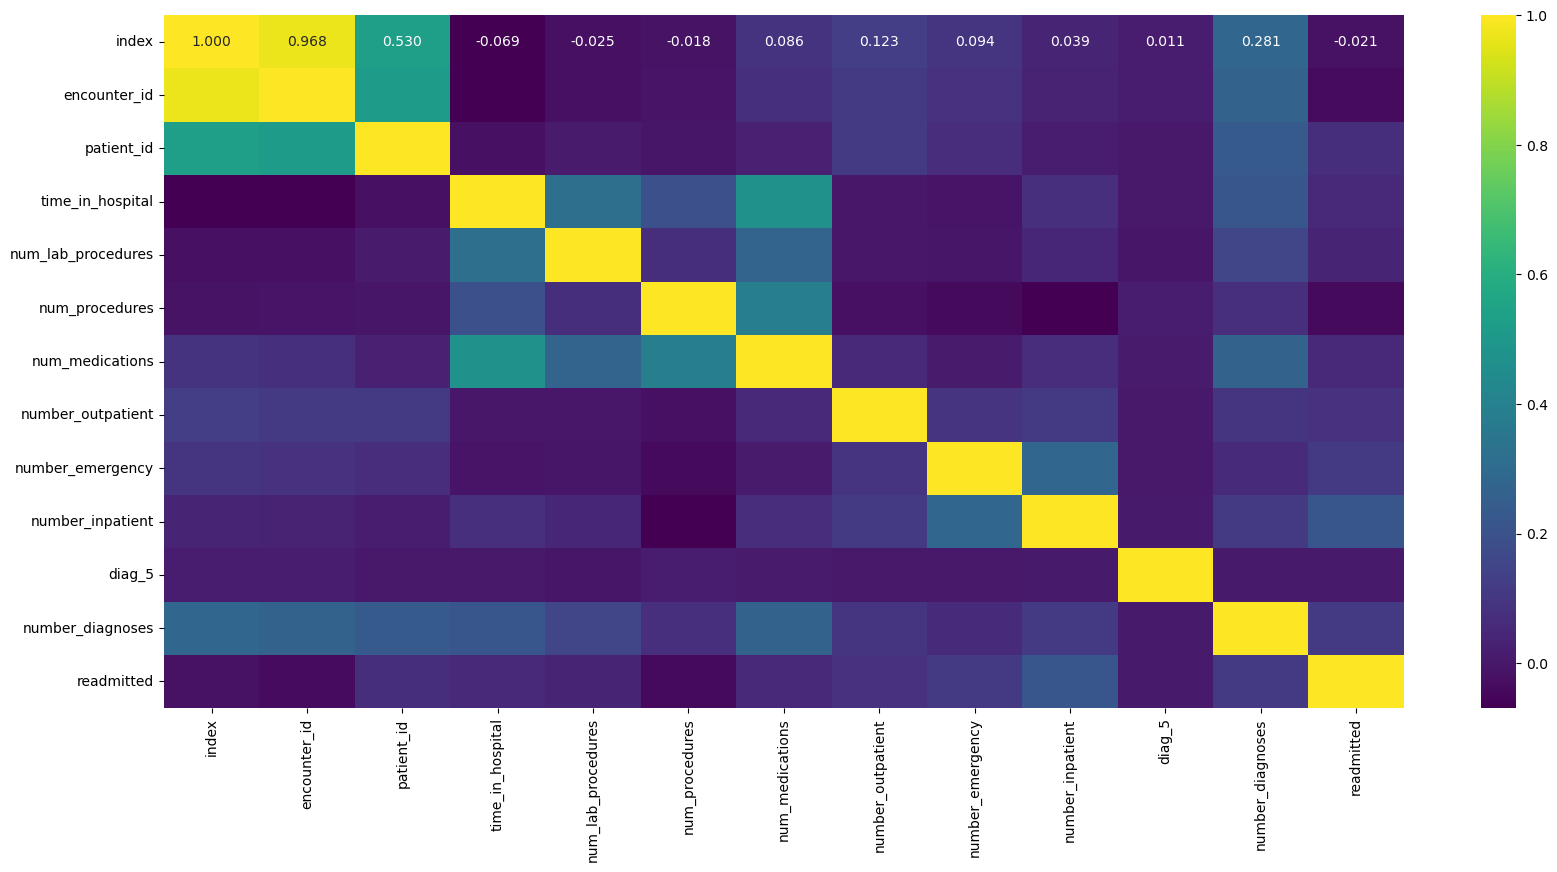

In [24]:
#Using Seaborn to see above correlation in a HeatMap:
corr_matrix_pearson = df_staged.corr(method='pearson', numeric_only=True)
sns.heatmap(corr_matrix_pearson, fmt = '.3f',cmap='viridis', annot=True)

corr_matrix_pearson.sort_values(by = ['readmitted'], ascending = False)

index  encounter_id  patient_id  time_in_hospital  \
index               1.000000      1.000000    0.546077         -0.064109   
encounter_id        1.000000      1.000000    0.546077         -0.064109   
patient_id          0.546077      0.546077    1.000000         -0.017147   
time_in_hospital   -0.064109     -0.064109   -0.017147          1.000000   
num_lab_procedures -0.011197     -0.011197    0.018494          0.336423   
num_procedures     -0.030337     -0.030337   -0.018507          0.182950   
num_medications     0.104648      0.104648    0.049932          0.465723   
number_outpatient   0.156066      0.156066    0.157139         -0.013506   
number_emergency    0.129148      0.129148    0.112081         -0.005694   
number_inpatient    0.041031      0.041031    0.026844          0.094414   
diag_5              0.010871      0.010871    0.001768         -0.000074   
number_diagnoses    0.294219      0.294219    0.241512          0.234734   
readmitted         -0.021179     -0.021179    0.084023          0.062689   

                    num_lab_procedures  num_procedures  num_medications  \
index                        -0.011197       -0.030337         0.104648   
encounter_id                 -0.011197       -0.030337         0.104648   
patient_id                    0.018494       -0.018507         0.049932   
time_in_hospital              0.336423        0.182950         0.465723   
num_lab_procedures            1.000000        0.031826         0.250916   
num_procedures                0.031826        1.000000         0.351167   
num_medications               0.250916        0.351167         1.000000   
number_outpatient            -0.024228       -0.025054         0.080084   
number_emergency              0.000658       -0.053748         0.041155   
number_inpatient              0.042366       -0.065126         0.101433   
diag_5                       -0.007362        0.010598         0.007561   
number_diagnoses              0.170069        0.068289         0.295809   
readmitted                    0.038831       -0.046576         0.072861   

                    number_outpatient  number_emergency  number_inpatient  \
index                        0.156066          0.129148          0.041031   
encounter_id                 0.156066          0.129148          0.041031   
patient_id                   0.157139          0.112081          0.026844   
time_in_hospital            -0.013506         -0.005694          0.094414   
num_lab_procedures          -0.024228          0.000658          0.042366   
num_procedures              -0.025054         -0.053748         -0.065126   
num_medications              0.080084          0.041155          0.101433   
number_outpatient            1.000000          0.170967          0.152237   
number_emergency             0.170967          1.000000          0.219840   
number_inpatient             0.152237          0.219840          1.000000   
diag_5                      -0.000898         -0.000447          0.006702   
number_diagnoses             0.111204          0.089714          0.140753   
readmitted                   0.109203          0.124147          0.227898   

                      diag_5  number_diagnoses  readmitted  
index               0.010871          0.294219   -0.021179  
encounter_id        0.010871          0.294219   -0.021179  
patient_id          0.001768          0.241512    0.084023  
time_in_hospital   -0.000074          0.234734    0.062689  
num_lab_procedures -0.007362          0.170069    0.038831  
num_procedures      0.010598          0.068289   -0.046576  
num_medications     0.007561          0.295809    0.072861  
number_outpatient  -0.000898          0.111204    0.109203  
number_emergency   -0.000447          0.089714    0.124147  
number_inpatient    0.006702          0.140753    0.227898  
diag_5              1.000000          0.002851    0.003116  
number_diagnoses    0.002851          1.000000    0.104218  
readmitted          0.003116       

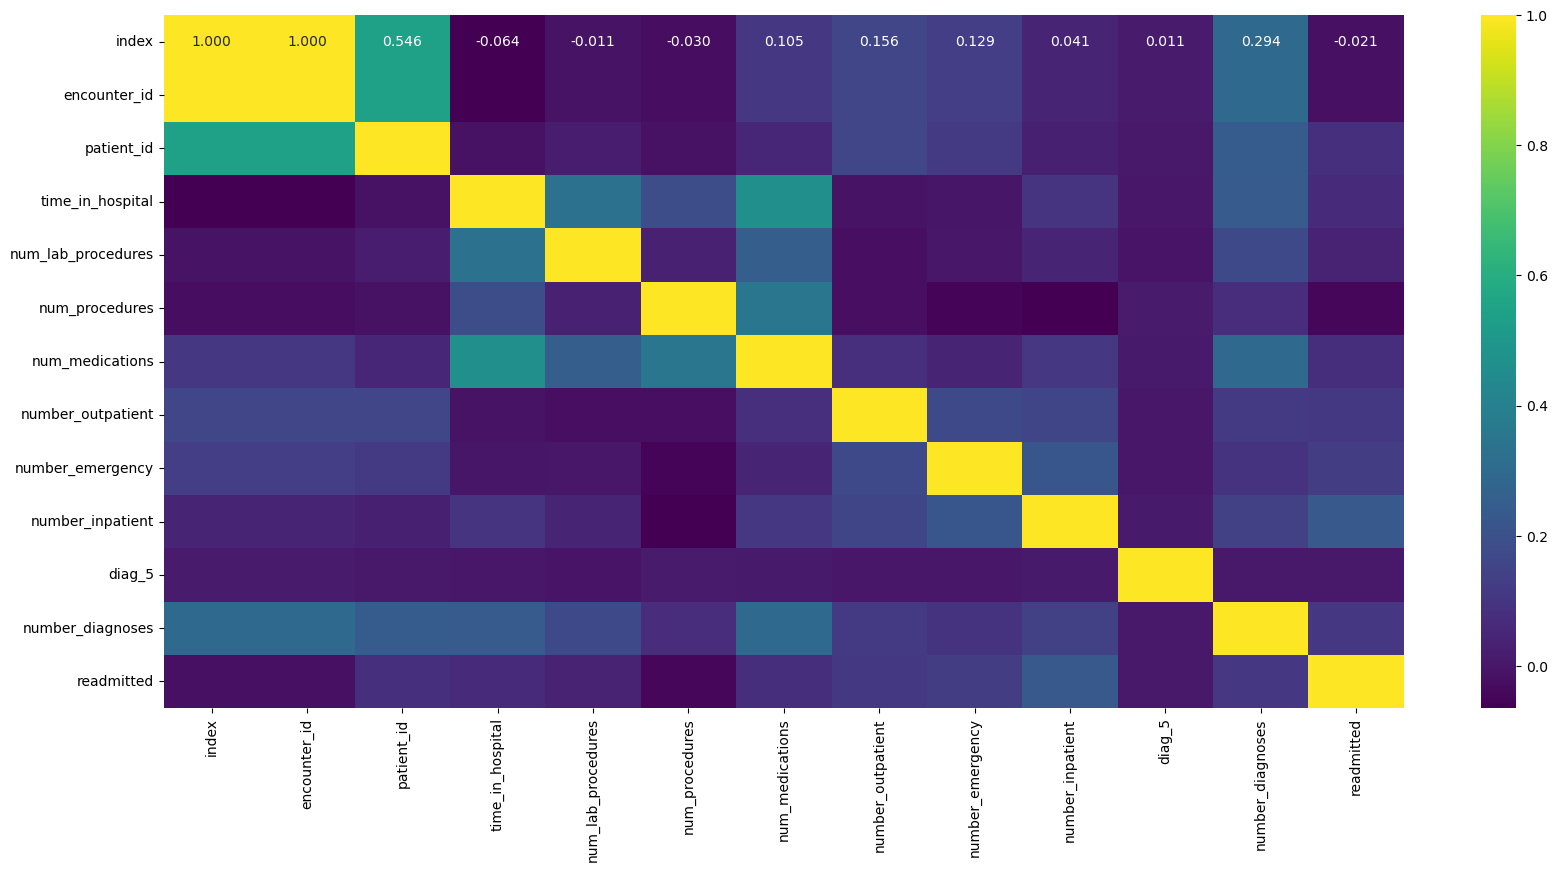

In [25]:
corr_matrix_spearman = df_staged.corr(method='spearman', numeric_only=True)
sns.heatmap(corr_matrix_spearman,fmt = '.3f' ,cmap='viridis', annot=True)

corr_matrix_spearman

#### Distribution between Age Group and Readmission:

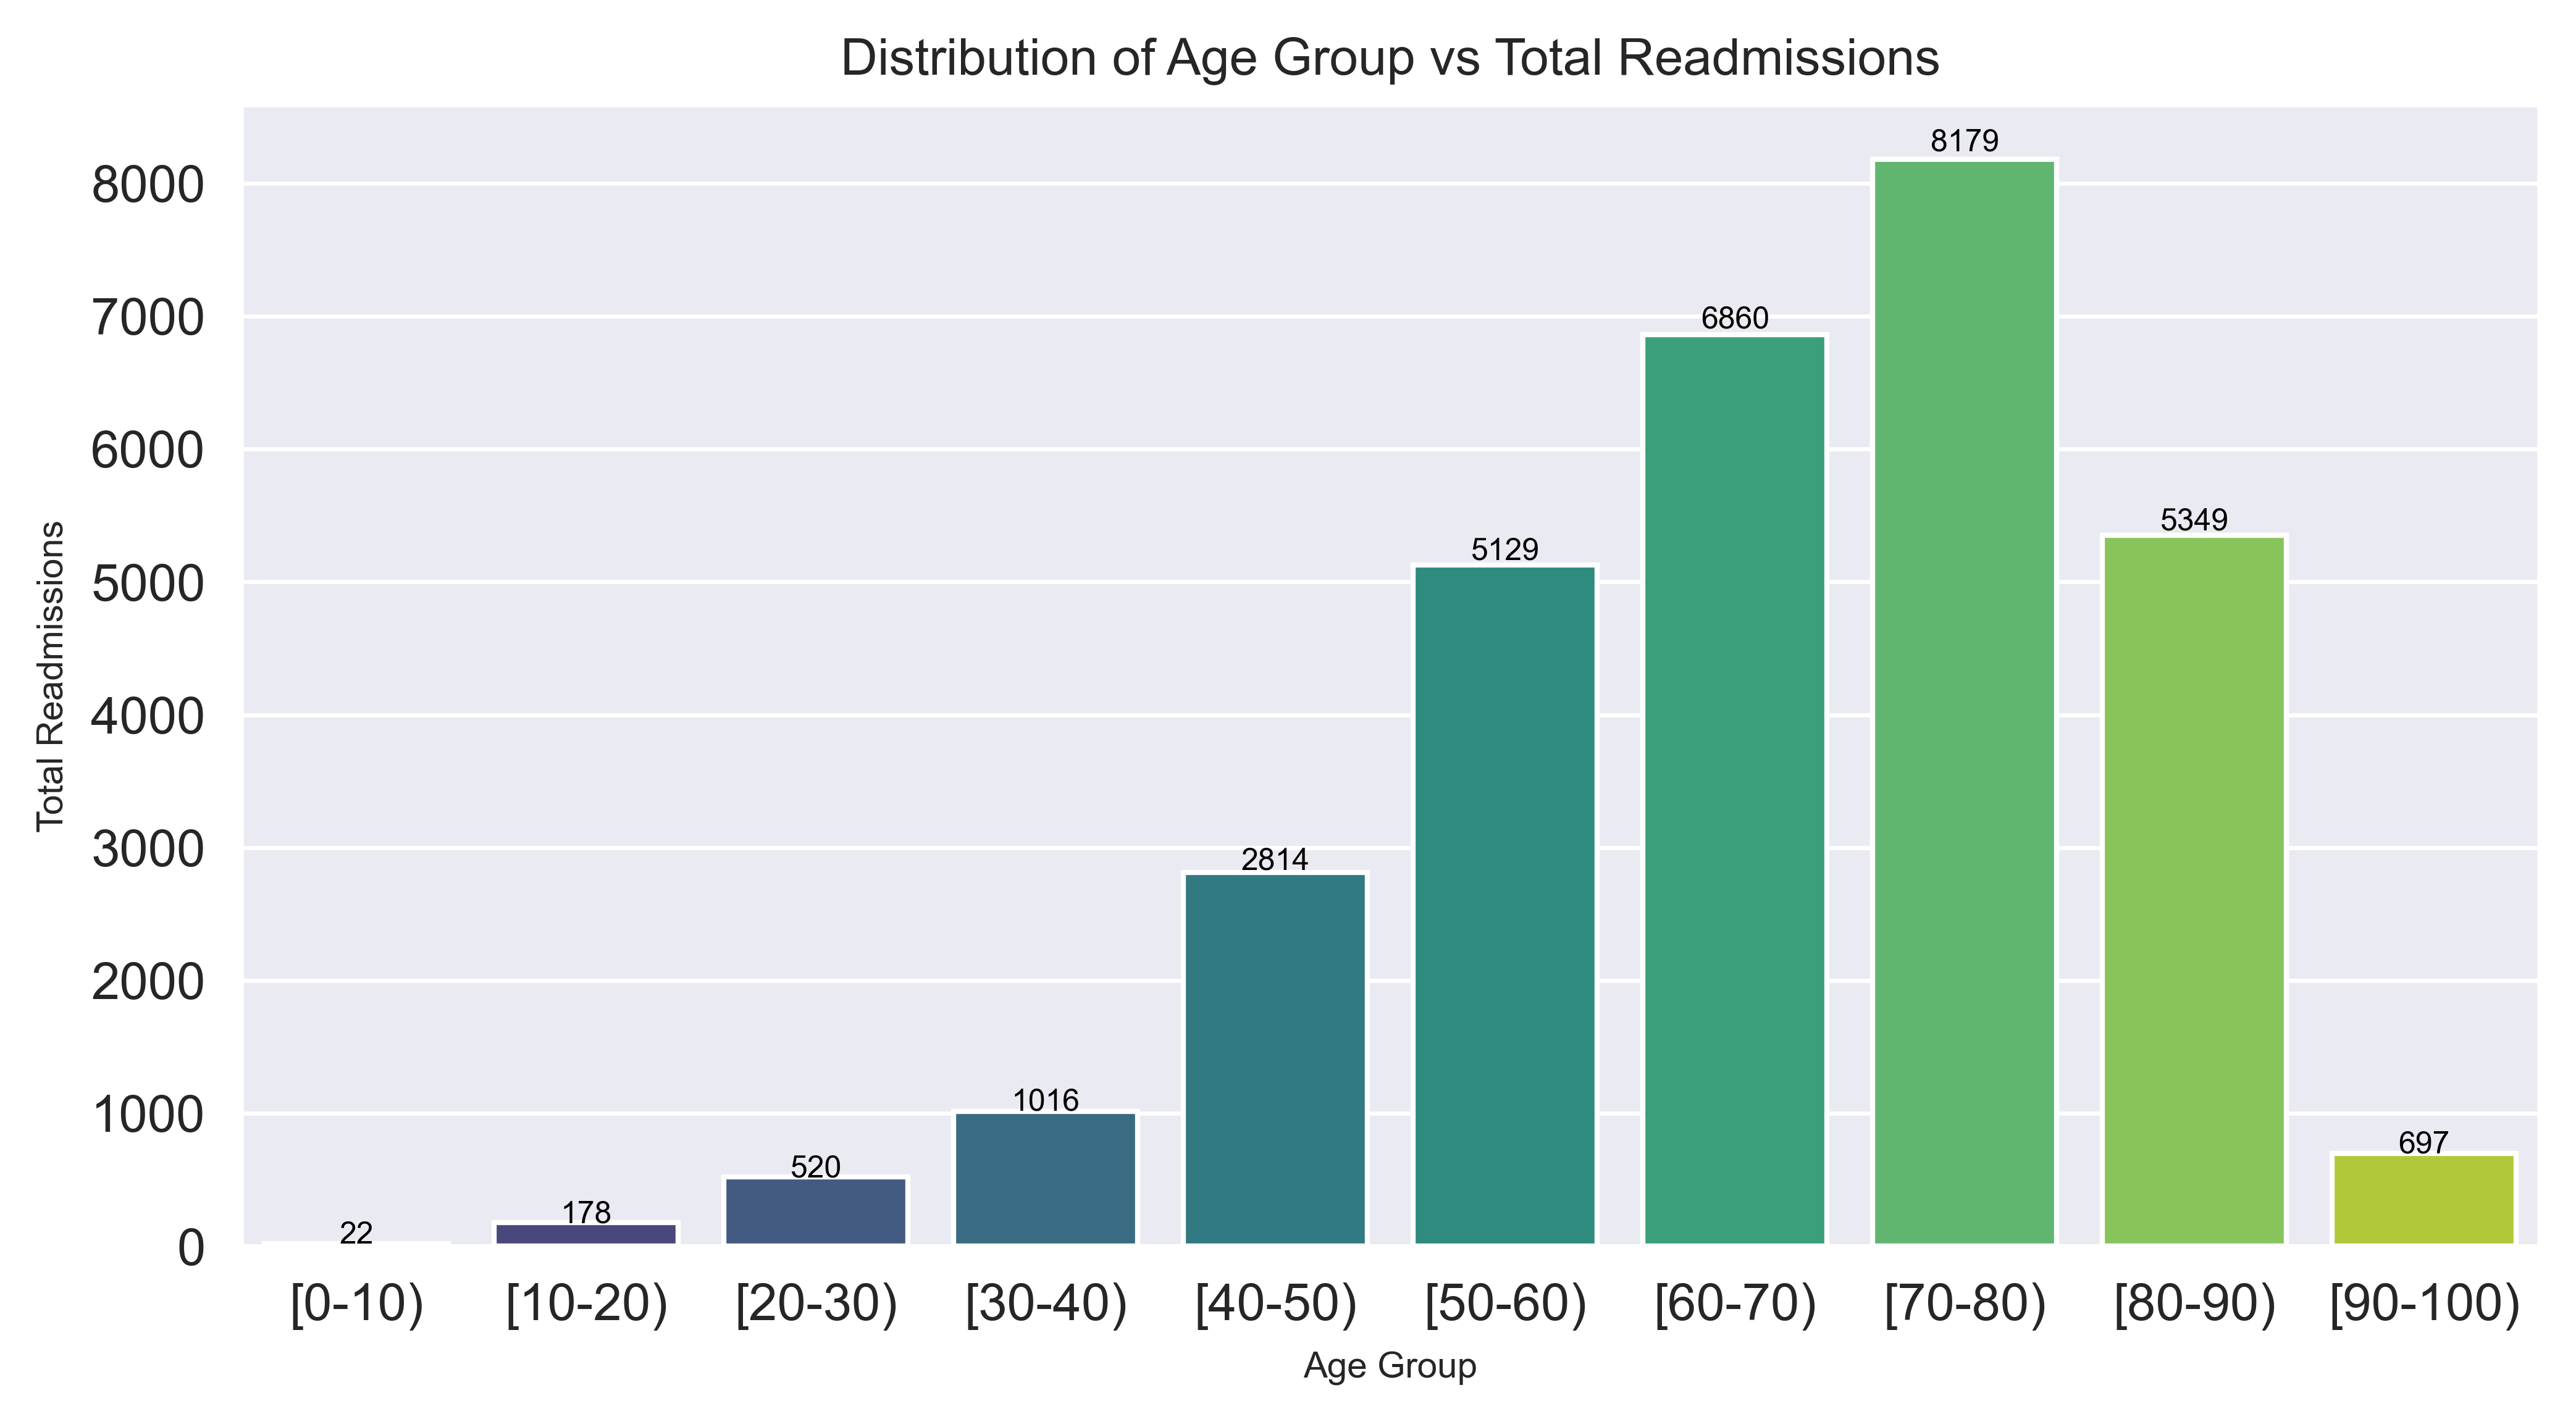

age  readmitted
0    [0-10)          22
1   [10-20)         178
2   [20-30)         520
3   [30-40)        1016
4   [40-50)        2814
5   [50-60)        5129
6   [60-70)        6860
7   [70-80)        8179
8   [80-90)        5349
9  [90-100)         697

In [26]:
age_readmitted = df_staged.groupby('age')['readmitted'].sum()
plt.figure(figsize =(8,4), dpi = 600)
sns.set_style('darkgrid')
label = sns.barplot(x=age_readmitted.index, y= age_readmitted.values, palette = 'viridis')
for l in label.patches:
    # Get the height of the bar
    height = l.get_height()
    if height>0:
    # Add text label above the bar
        label.text(l.get_x() + l.get_width() / 2.0, height + 0.008 * height, 
            f'{height:.0f}', ha='center', va='baseline', fontsize=6, color='black')

plt.xlabel('Age Group',size = 7)
plt.ylabel('Total Readmissions',size = 7)
plt.title('Distribution of Age Group vs Total Readmissions', size = 10)
plt.show()

df_staged.groupby('age')['readmitted'].sum().reset_index()

In [27]:
age_readmitted_fig = df_staged.groupby('age')['readmitted'].sum().reset_index()

age_readmitted_fig = px.bar(age_readmitted_fig, 
                             x='age',
                             y= 'readmitted',
                             hover_data=['age', 'readmitted'],
                             text_auto = False,
                             height= 550,
                             title = 'Distribution of Age vs Total Readmissions',
                             color='readmitted')
age_readmitted_fig.update_xaxes(title = 'Age Group')
age_readmitted_fig.show()

#### Distribution between Readmissions Vs. Race and Gender:

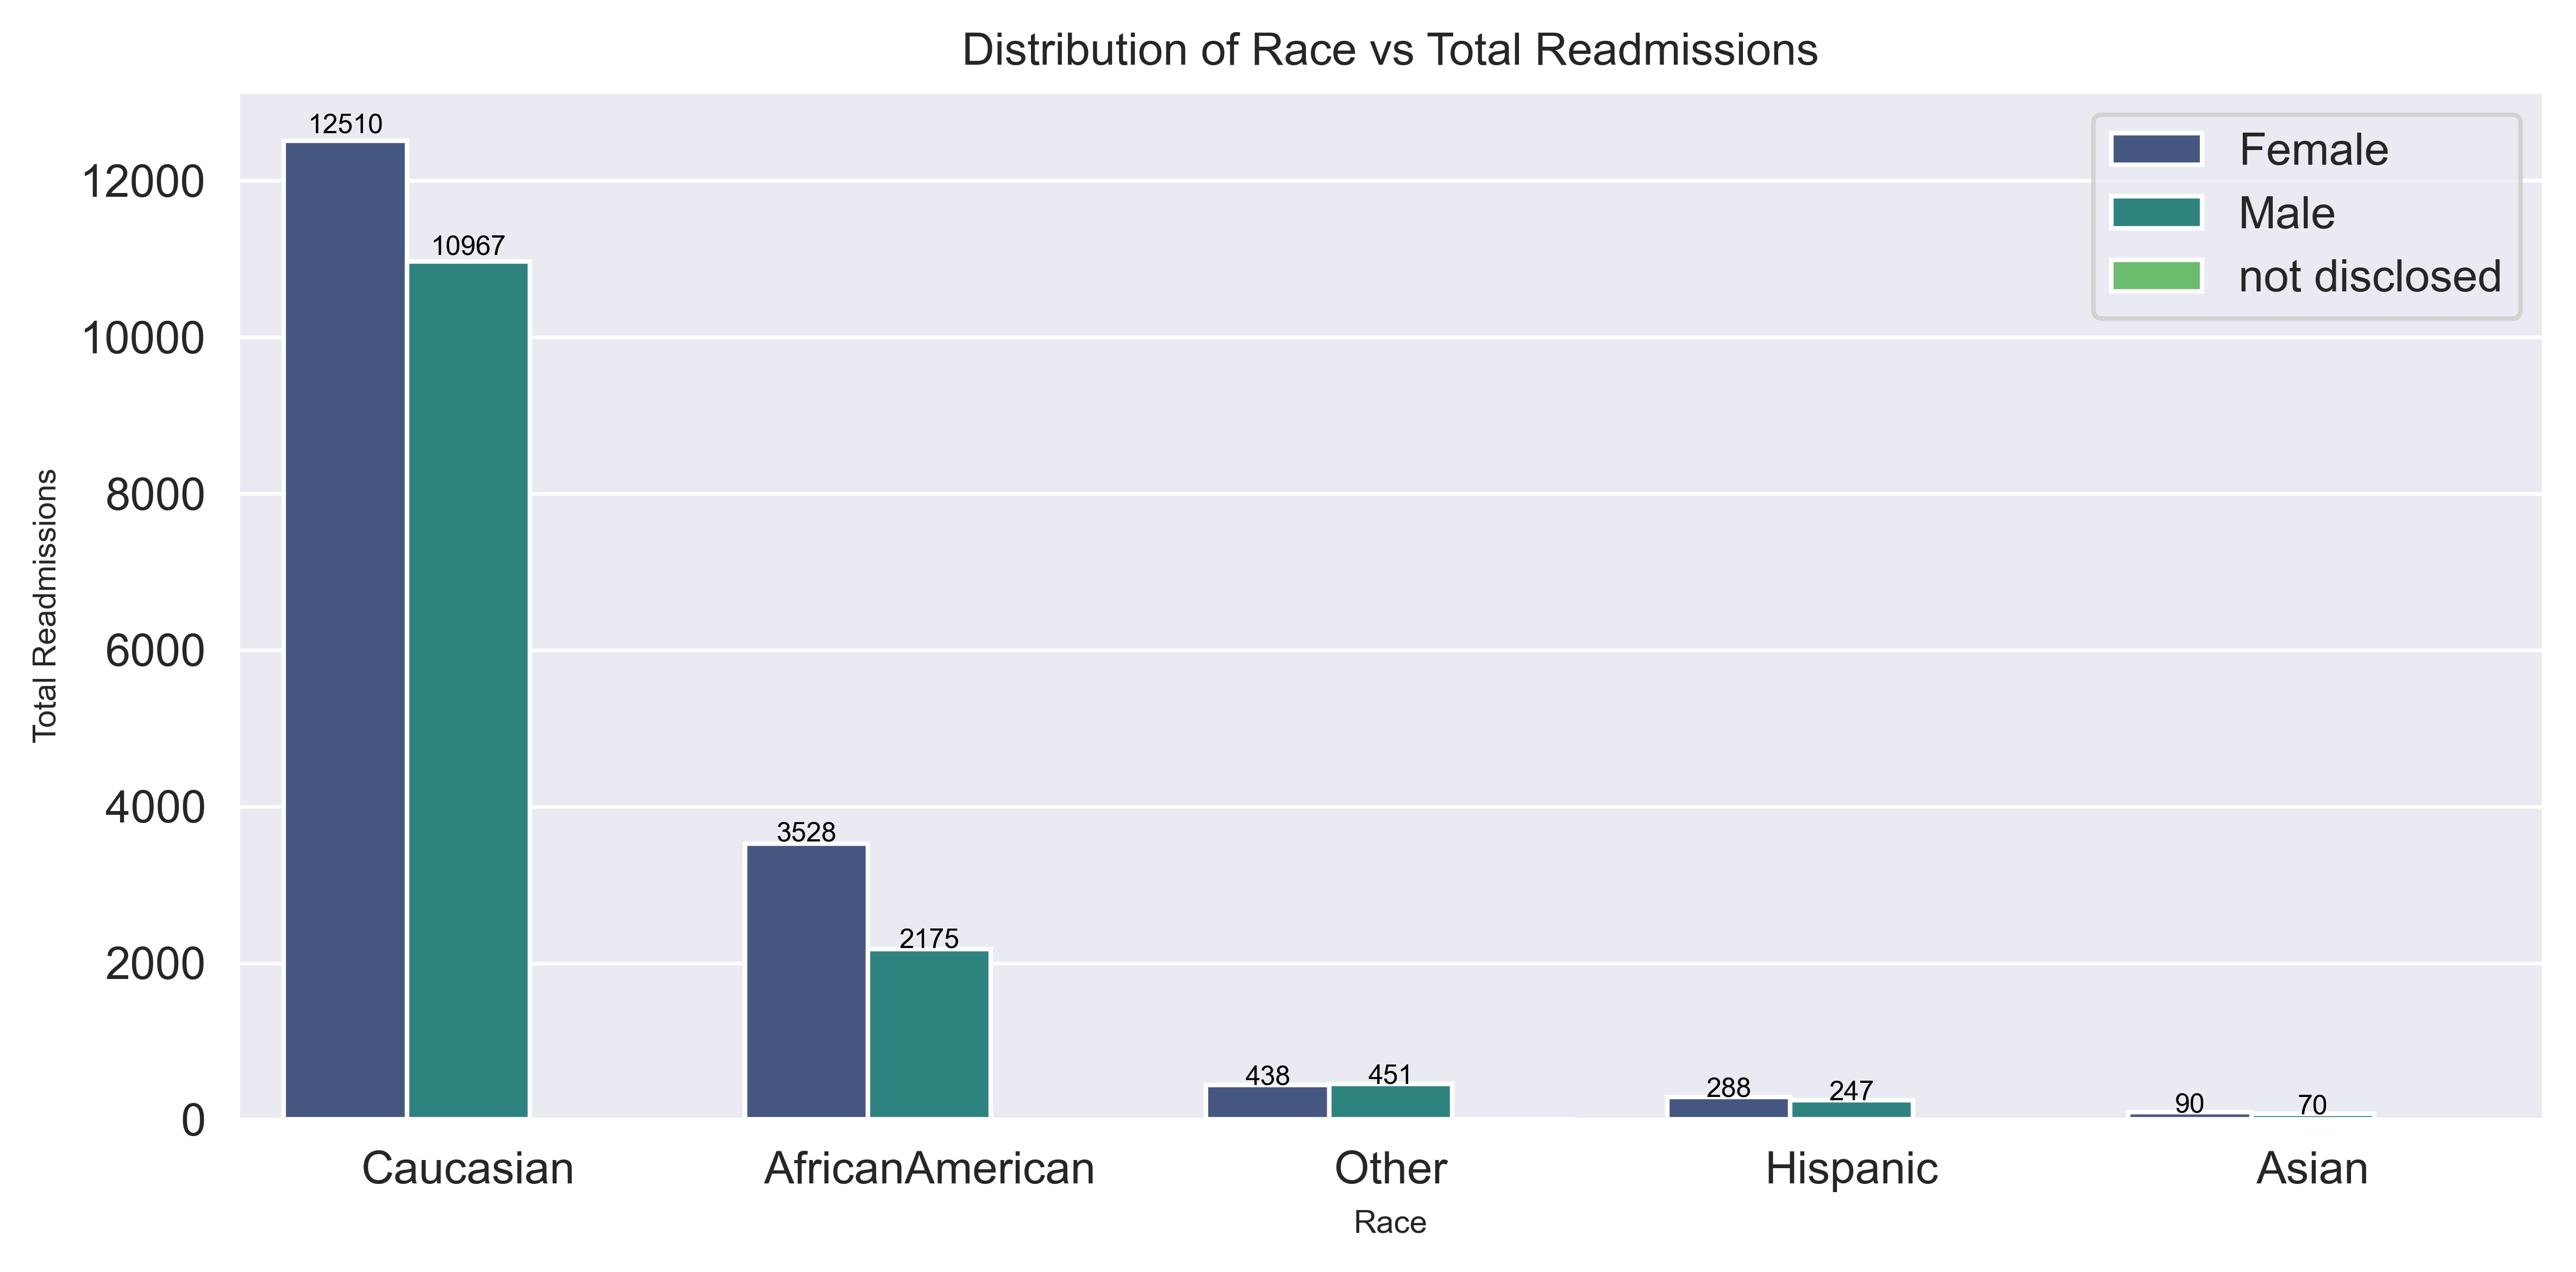

index             race         gender  readmitted
0       4        Caucasian         Female       12510
1       5        Caucasian           Male       10967
2       0  AfricanAmerican         Female        3528
3       1  AfricanAmerican           Male        2175
4       9            Other           Male         451
5       8            Other         Female         438
6       6         Hispanic         Female         288
7       7         Hispanic           Male         247
8       2            Asian         Female          90
9       3            Asian           Male          70
10     10            Other  not disclosed           0

In [28]:
race_readmitted = df_staged.groupby(['race','gender'])['readmitted'].sum().reset_index()
race_readmitted = race_readmitted.sort_values(by=['readmitted'], ascending=False)
plt.figure(figsize =(8,4), dpi = 600)
sns.set_style('darkgrid')
ax = sns.barplot(x='race', y= 'readmitted', hue='gender',  data= race_readmitted,palette = 'viridis')

# Add labels for each bar
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    if height>0:
    # Add text label above the bar
        ax.text(p.get_x() + p.get_width() / 2.0, height + 0.008 * height, 
            f'{height:.0f}', ha='center', va='baseline', fontsize=6, color='black')

plt.xlabel('Race',size = 7)
plt.ylabel('Total Readmissions',size = 7)
plt.title('Distribution of Race vs Total Readmissions', size = 10)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

race_readmitted.reset_index()

In [29]:
### Interactive Plot using Plotly:

race_readmitted_fig = race_readmitted

race_readmitted_fig = px.bar(race_readmitted_fig, 
                             x='race',
                             y= 'readmitted',
                             color='gender',
                             hover_data=['race', 'readmitted'],
                             text_auto = False,
                             height= 550,
                             title = 'Distribution of Race vs Total Readmissions')

race_readmitted_fig.show()

#### Distribution Between Medical Speciality and Readmission:

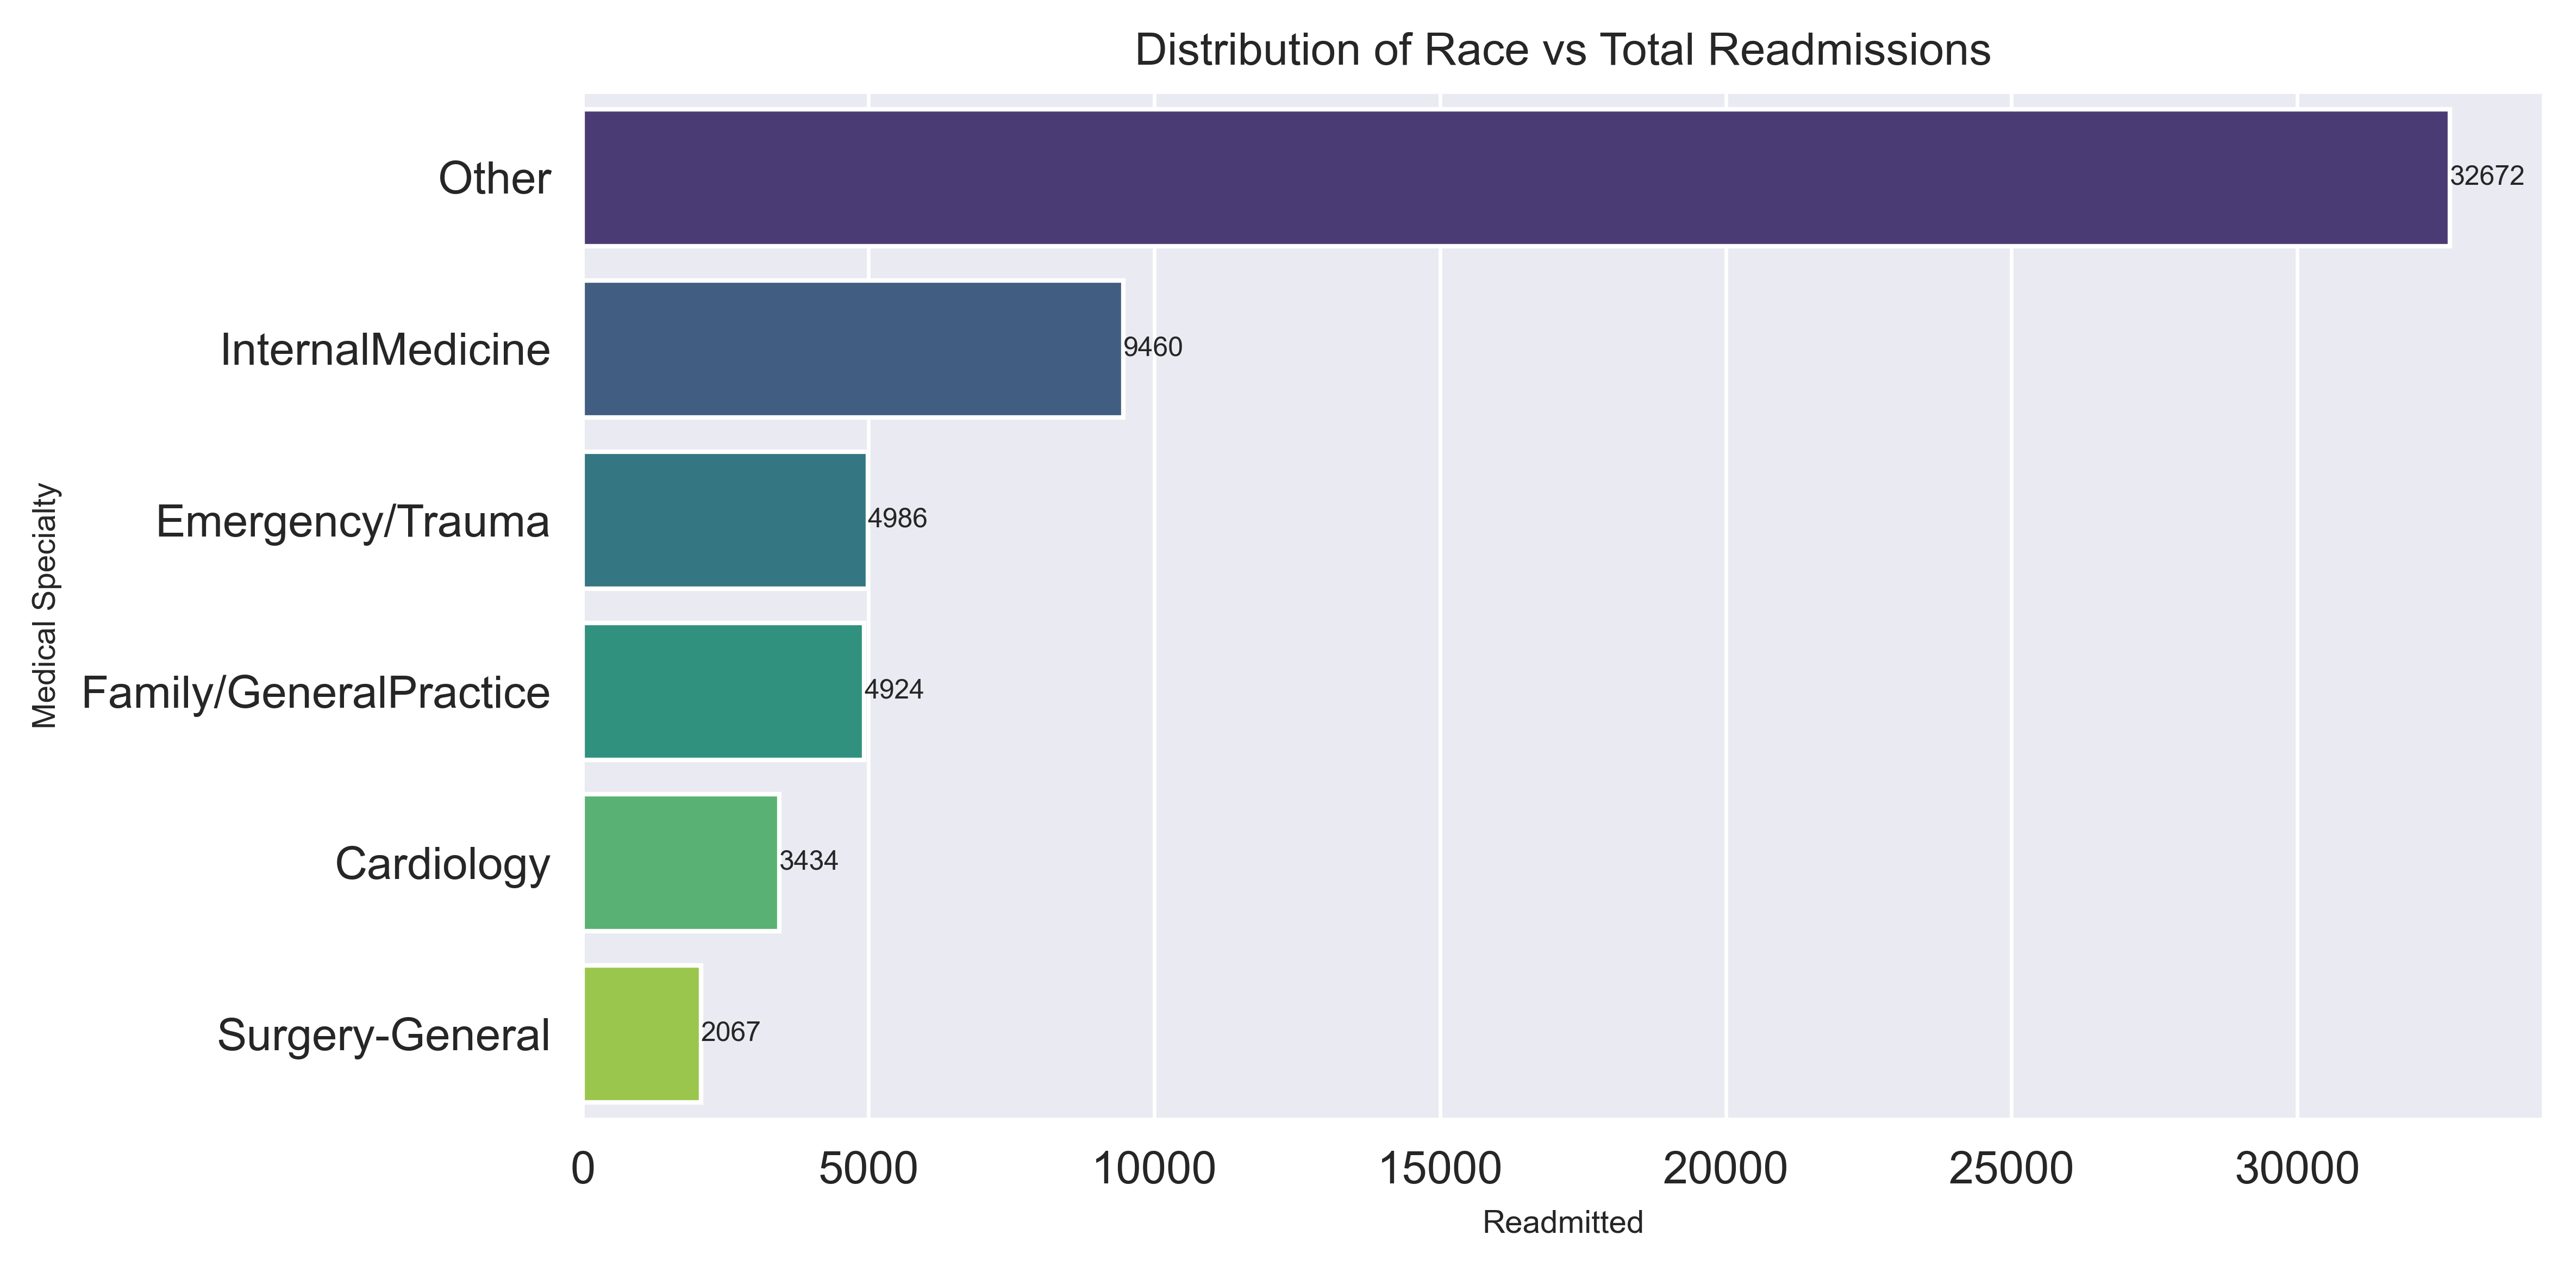

index       medical_specialty  readmitted
0     28                   Other       32672
1     17        InternalMedicine        9460
2      7        Emergency/Trauma        4986
3     10  Family/GeneralPractice        4924
4      3              Cardiology        3434
5     56         Surgery-General        2067

In [30]:
avg_speciality_readmitted = df_staged.groupby(['medical_specialty'])['readmitted'].count().reset_index().sort_values(by=['readmitted'], ascending=False)
top_avg_speciality_readmitted = avg_speciality_readmitted.head(6)
plt.figure(figsize =(8,4), dpi = 600)
sns.set_style('darkgrid')
ax = sns.barplot(y='medical_specialty', x= 'readmitted', data= top_avg_speciality_readmitted, palette = 'viridis')
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar (value)
    ax.text(width, p.get_y() + p.get_height() / 2,  # Position of the text
            f'{int(width)}',  # Text to display
            ha='left', va='center', size=6)  # Text alignment and size
plt.xlabel('Readmitted',size = 7)
plt.ylabel('Medical Specialty',size = 7)
plt.title('Distribution of Race vs Total Readmissions', size = 10)
##ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

top_avg_speciality_readmitted.reset_index()

In [31]:
# Interactive plot with Plotly:


speciality_readmitted = px.bar(top_avg_speciality_readmitted.sort_values('readmitted', ascending = True), 
                          x='readmitted', y = 'medical_specialty', color = 'readmitted', text_auto ='.2s')

speciality_readmitted

#### Readmission Vs. Procedures, Lab Procedures, Diagnoses and Medications

In [32]:
readmitted_proced = df_staged.groupby(['num_procedures'])['readmitted'].count().reset_index().sort_values(by = ['num_procedures'] )

readmitted_lab_proced = df_staged.groupby(['num_lab_procedures'])['readmitted'].count().reset_index().sort_values(by = ['num_lab_procedures'] )

readmitted_diag = df_staged.groupby(['number_diagnoses'])['readmitted'].count().reset_index().sort_values(by = ['number_diagnoses'] )

readmitted_med = df_staged.groupby(['num_medications'])['readmitted'].count().reset_index().sort_values(by = ['num_medications'] )



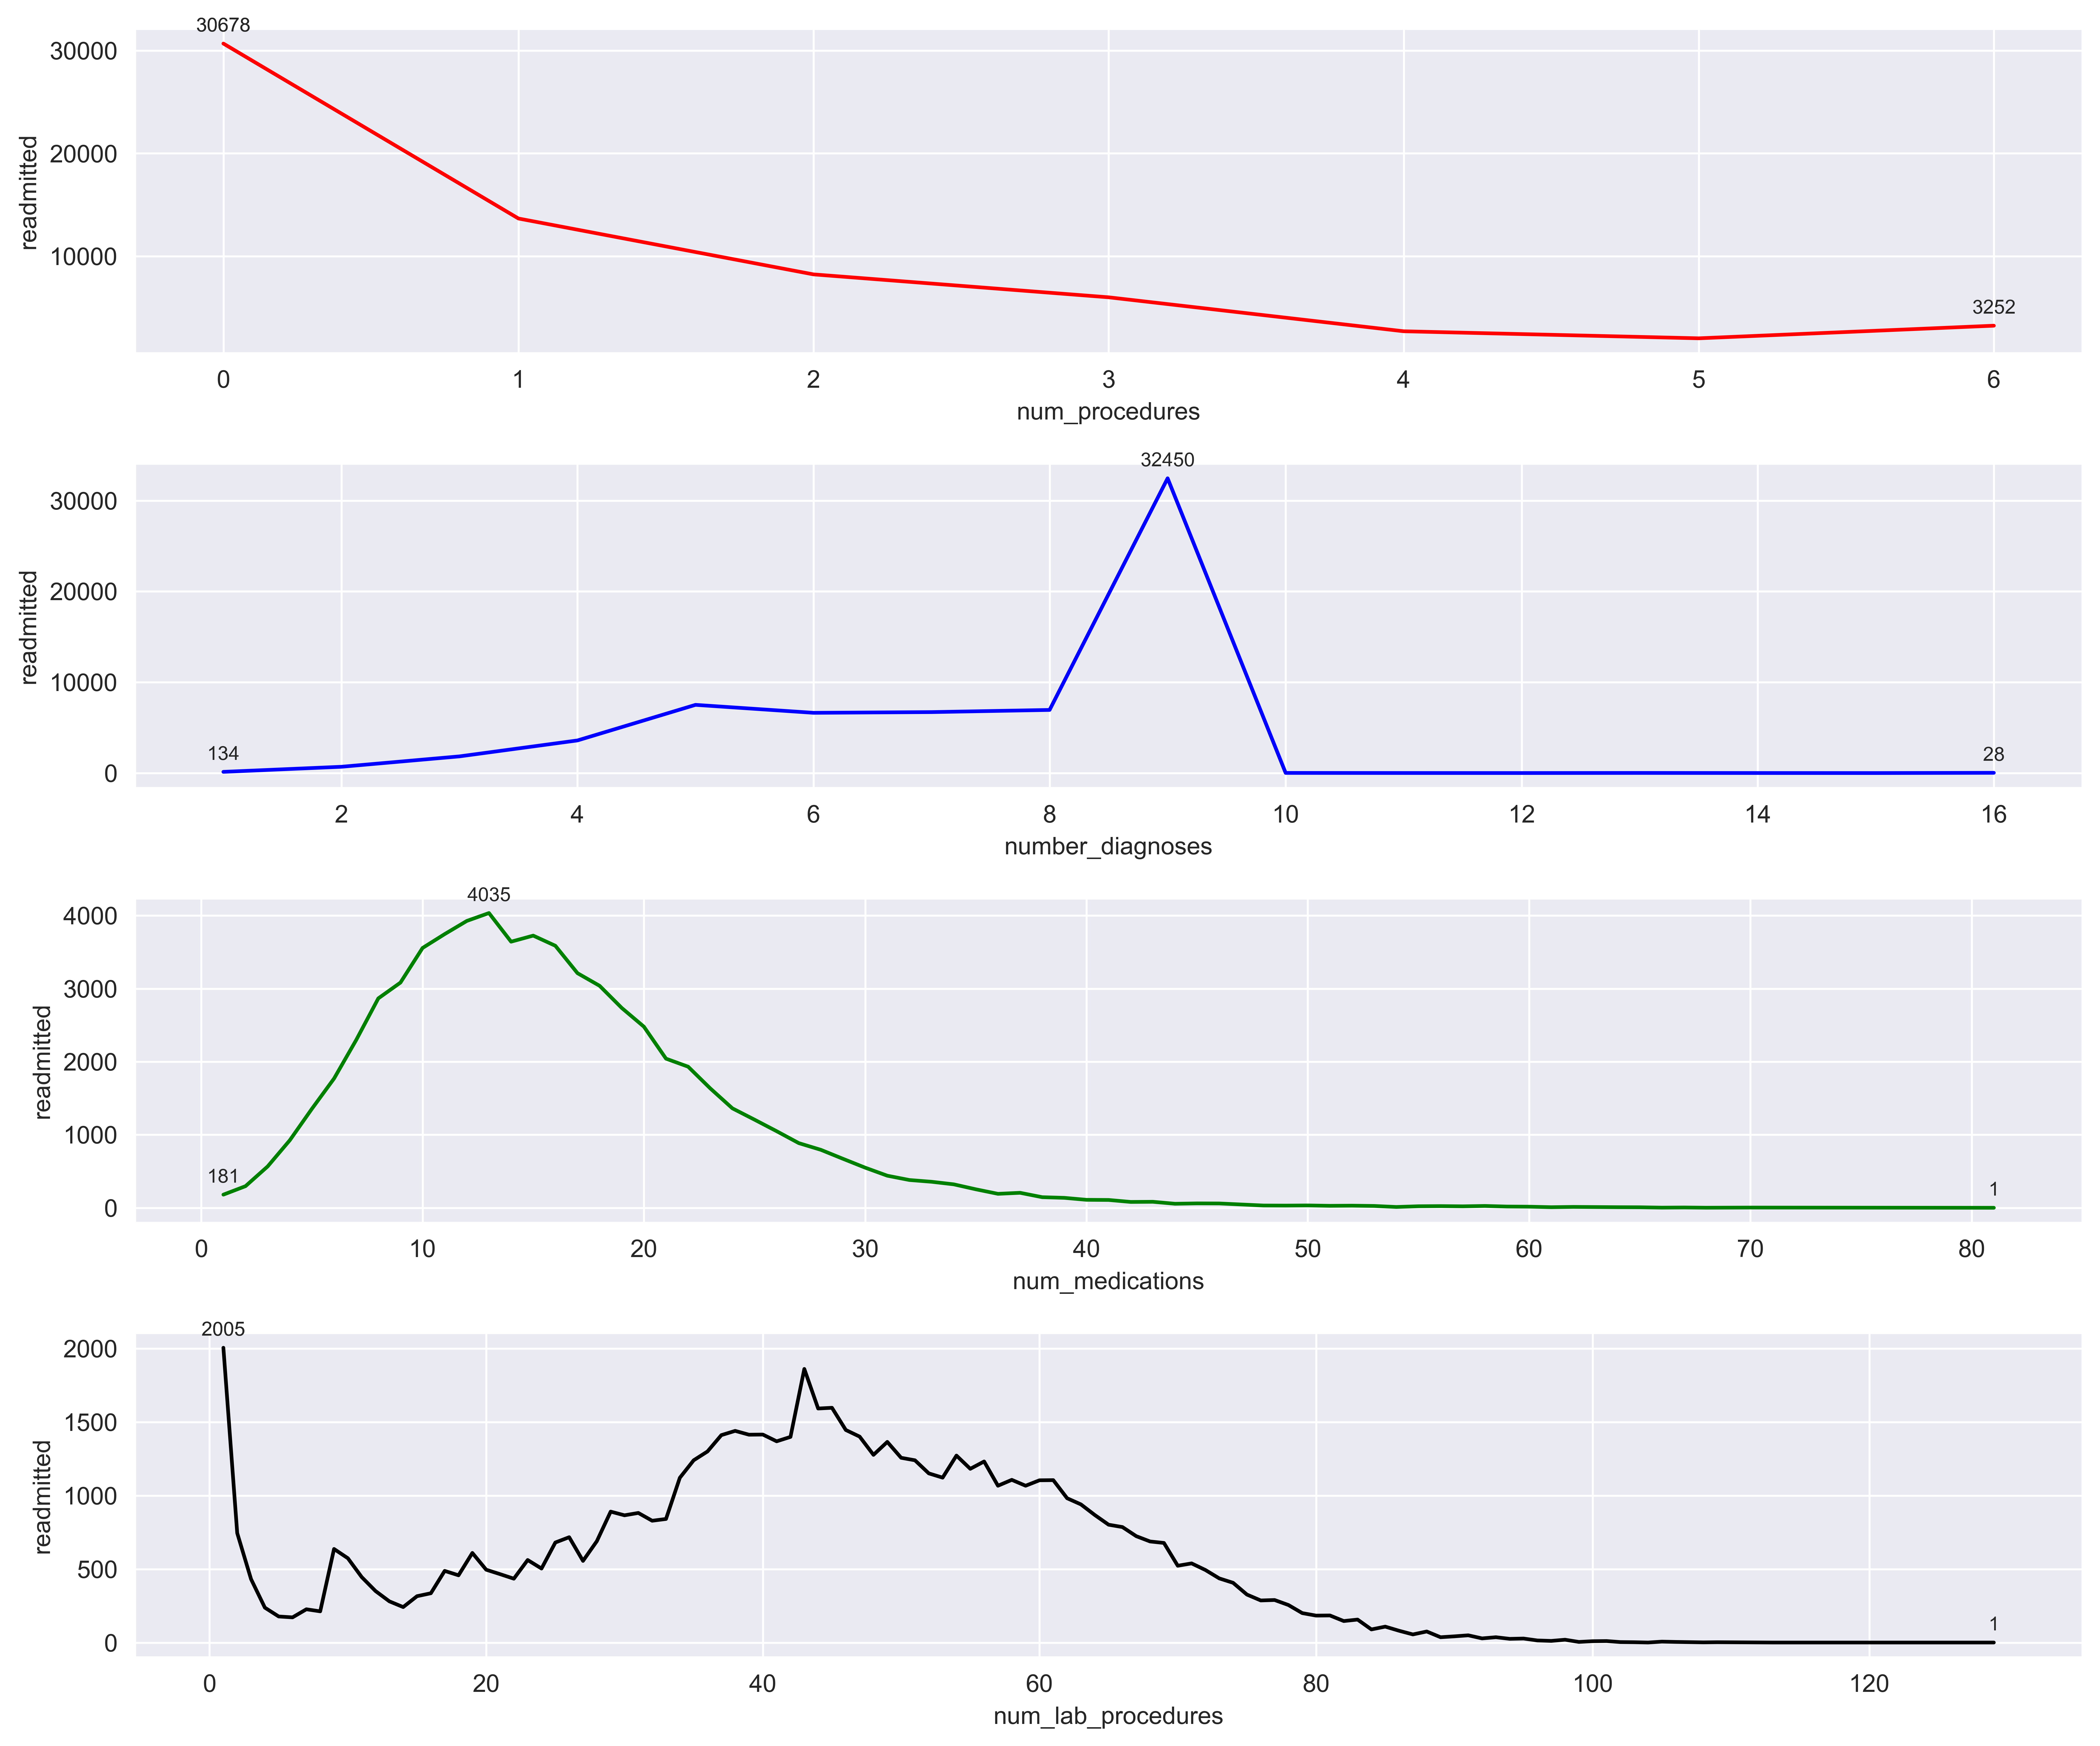

In [33]:
### Creating subplots:
def annotate_points(ax, x_data, y_data):
    # Annotate the start
    ax.annotate(f"{y_data[0]}", (x_data[0], y_data[0]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    # Annotate the peak
    peak_index = y_data.idxmax()
    ax.annotate(f"{y_data[peak_index]}", (x_data[peak_index], y_data[peak_index]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    # Annotate the end
    ax.annotate(f"{y_data.iloc[-1]}", (x_data.iloc[-1], y_data.iloc[-1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Determining Subplots:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, sharey= False, figsize =(12,10), dpi = 600, tight_layout=True )#,squeeze = True )

#first plot:
sns.lineplot(data=readmitted_proced, x= 'num_procedures', y='readmitted', ax = ax1, color = 'red')
annotate_points(ax1, readmitted_proced['num_procedures'], readmitted_proced['readmitted'])

# Second Plot:
sns.lineplot(data=readmitted_diag, x= 'number_diagnoses', y='readmitted', ax= ax2, color = 'blue')
annotate_points(ax2, readmitted_diag['number_diagnoses'], readmitted_diag['readmitted'])

# third plot:
sns.lineplot(data=readmitted_med, x= 'num_medications', y='readmitted', ax= ax3, color = 'green')
annotate_points(ax3, readmitted_med['num_medications'], readmitted_med['readmitted'])

#Fourth plot:
sns.lineplot(data=readmitted_lab_proced, x= 'num_lab_procedures', y='readmitted', ax = ax4, color = 'black')
annotate_points(ax4, readmitted_lab_proced['num_lab_procedures'], readmitted_lab_proced['readmitted'])


plt.show()

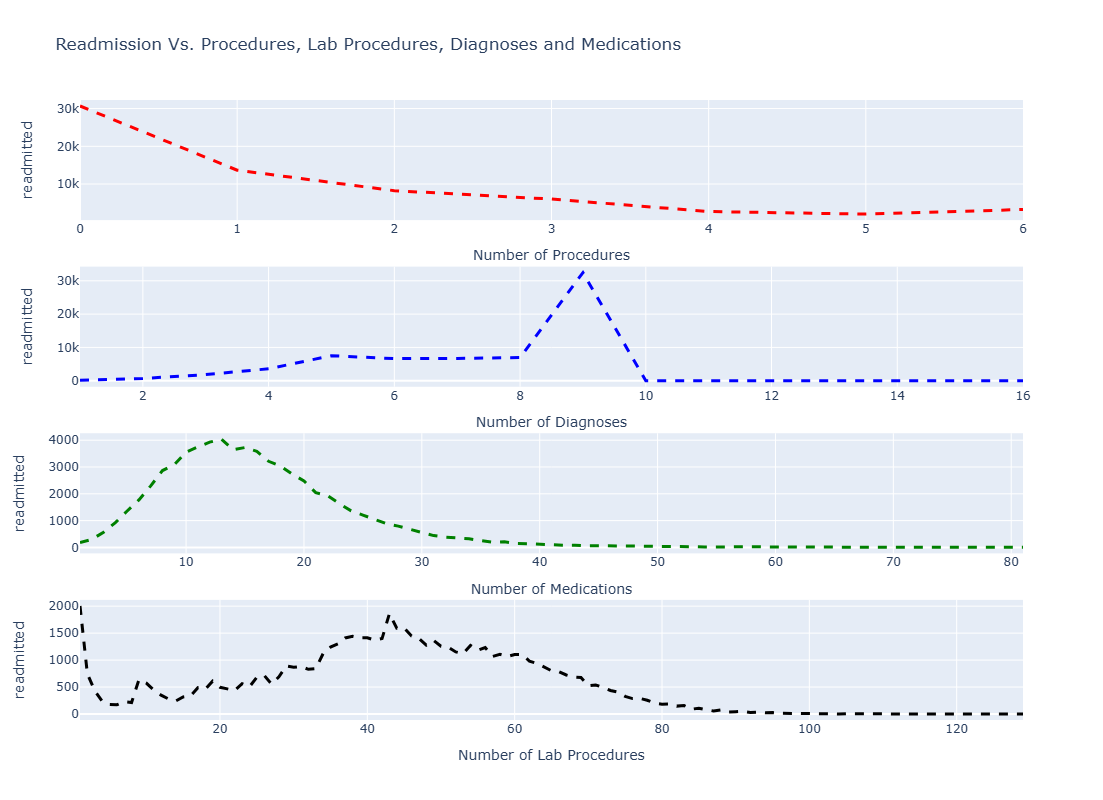

In [34]:

# Create the first line plot
fig_procedures = px.line(readmitted_proced, x='num_procedures', y='readmitted', title="Number of Procedures vs Readmitted")

# Create the second line plot
fig_diagnoses = px.line(readmitted_diag, x='number_diagnoses', y='readmitted', title="Number of Diagnoses vs Readmitted")

# Create the third line plot 

fig_medications = px.line(readmitted_med, x='num_medications', y='readmitted', title="Number of medications vs Readmitted")

# Create the Fourth plot

fig_lab_procedures = px.line(readmitted_lab_proced, x='num_lab_procedures', y='readmitted', title="Number of Lab Procedures vs Readmitted")


# Create subplots
fig = ps.make_subplots(rows=4, cols=1, shared_yaxes = False)

# Add first line plot to the subplots
for trace in fig_procedures['data']:
    fig.add_trace(trace, row=1, col=1)

# Add second line plot to the subplots
for trace in fig_diagnoses['data']:
    fig.add_trace(trace, row=2, col=1)
    
# Add third line plot to the subplots
for trace in fig_medications['data']:
    fig.add_trace(trace, row=3, col=1)

for trace in fig_lab_procedures['data']:
    fig.add_trace(trace, row=4, col=1)

# Update layout
fig.update_layout(height=800, width= 900, 
                  title_text="Readmission Vs. Procedures, Lab Procedures, Diagnoses and Medications",
                  showlegend=True)

fig.update_traces(line=dict(color='red', width=3, dash='dash'),row=1, col=1)
fig.update_traces(line=dict(color='blue', width=3, dash='dash'),row=2, col=1)
fig.update_traces(line=dict(color='green', width=3, dash='dash'),row=3, col=1)
fig.update_traces(line=dict(color='black', width=3, dash='dash'),row=4, col=1)
fig.update_xaxes(title_text = 'Number of Procedures',row=1, col=1)
fig.update_xaxes(title_text = 'Number of Diagnoses',row=2, col=1)
fig.update_xaxes(title_text = 'Number of Medications',row=3, col=1)
fig.update_xaxes(title_text = 'Number of Lab Procedures',row=4, col=1)
fig.update_yaxes(title_text = 'readmitted',row=1, col=1)
fig.update_yaxes(title_text = 'readmitted',row=2, col=1)
fig.update_yaxes(title_text = 'readmitted',row=3, col=1)
fig.update_yaxes(title_text = 'readmitted',row=4, col=1)


# Show plot
fig.show()


#### Analysing different length of stays in Hospital:

In [35]:
stays_hospital = df_staged.groupby(['time_in_hospital'])['readmitted'].sum().round(decimals = 3).reset_index().sort_values(by = ['time_in_hospital'] )

stays_hospital

time_in_hospital  readmitted
0                  1        3689
1                  2        4978
2                  3        5220
3                  4        4399
4                  5        3133
5                  6        2494
6                  7        1880
7                  8        1428
8                  9         969
9                 10         775
10                11         625
11                12         479
12                13         386
13                14         309

In [36]:
stays_speciality = df_staged.groupby(['medical_specialty'])['time_in_hospital'].mean().round(decimals = 3).reset_index().sort_values(by = ['time_in_hospital'], ascending = False)

longest_stays_speciality = stays_speciality.head(5)
longest_stays_speciality


medical_specialty  time_in_hospital
38             Pediatrics-Pulmonology            10.688
39  PhysicalMedicineandRehabilitation             8.891
30                   OutreachServices             8.250
31                          Pathology             8.111
44               Psychiatry-Addictive             8.000

In [37]:
least_stays_speciality = stays_speciality.tail(5)
least_stays_speciality

medical_specialty  time_in_hospital
51                          Speech             2.000
5                          DCPTEAM             2.000
36  Pediatrics-Hematology-Oncology             2.000
2         Anesthesiology-Pediatric             1.714
34    Pediatrics-EmergencyMedicine             1.000

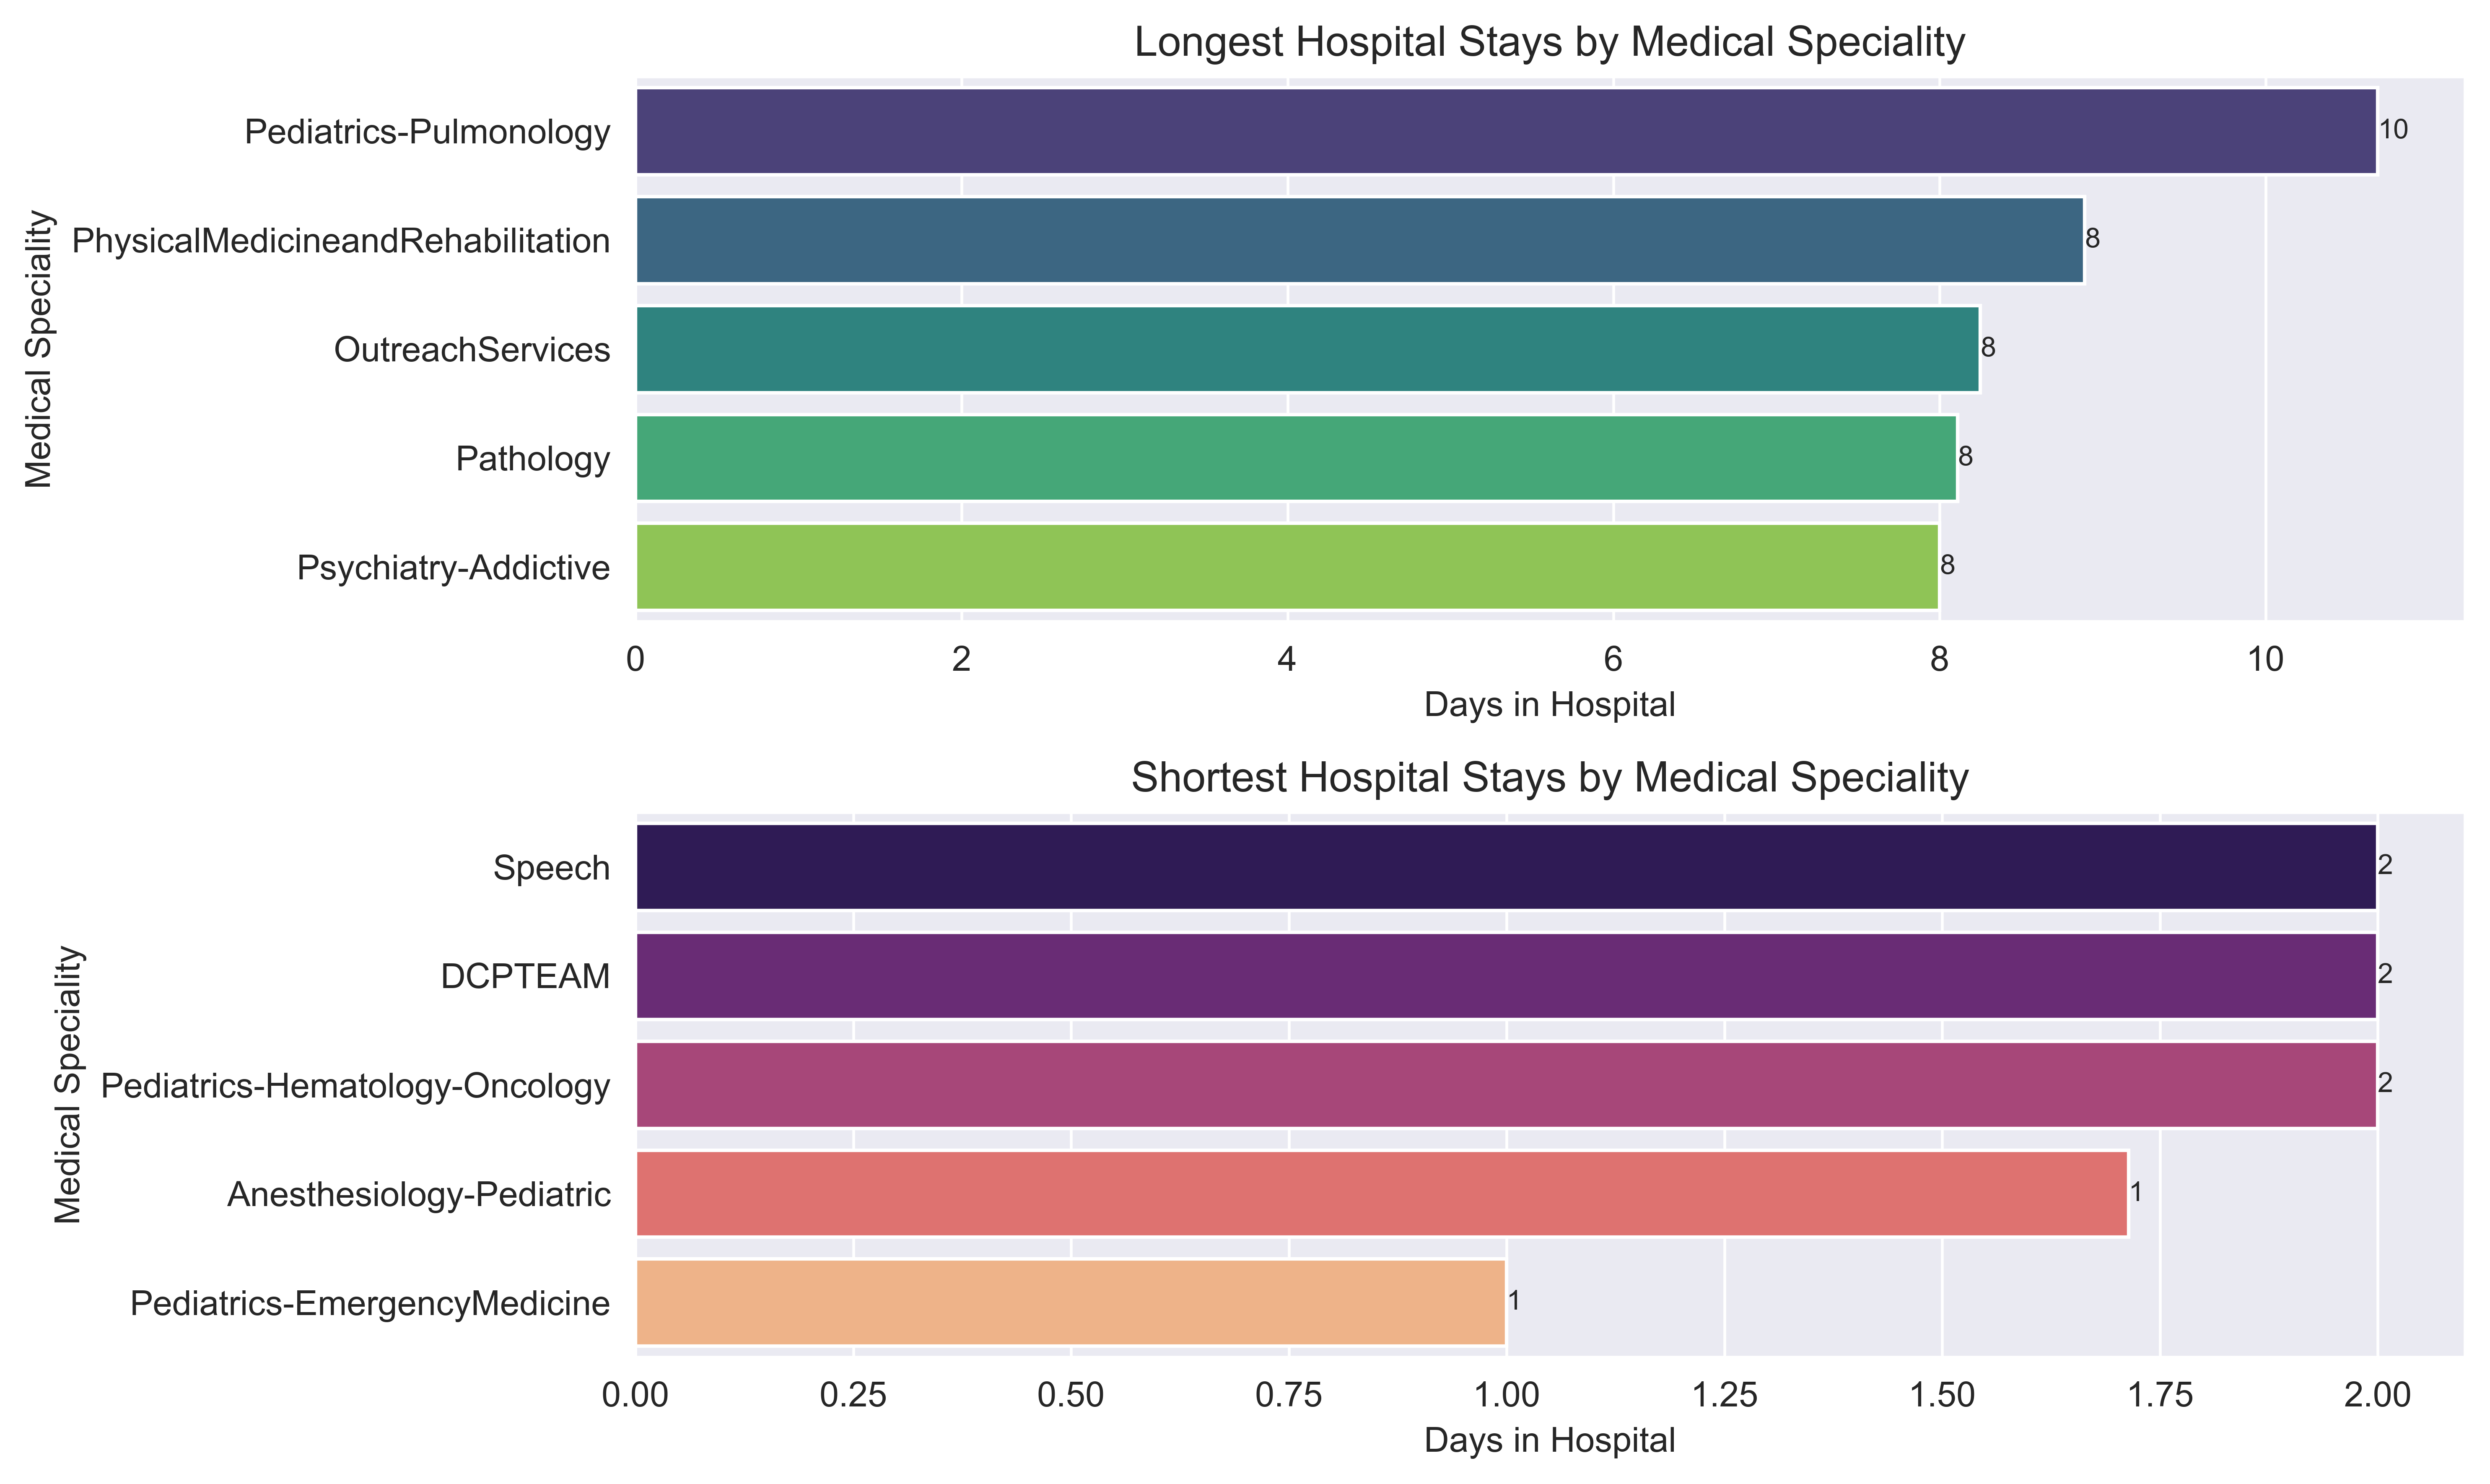

In [38]:

fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex= False, figsize =(10,6), dpi = 600, tight_layout=True, squeeze = True )
sns.barplot(data=longest_stays_speciality, y= 'medical_specialty', x='time_in_hospital', ax = ax1, palette = 'viridis')
for p in ax1.patches:
    width = p.get_width()  # Get the width of the bar (value)
    ax1.text(width, p.get_y() + p.get_height() / 2,  # Position of the text
            f'{int(width)}',  # Text to display
            ha='left', va='center', size=8)
    
sns.barplot(data=least_stays_speciality, y= 'medical_specialty', x='time_in_hospital', ax= ax2, palette = 'magma')
for p in ax2.patches:
    width = p.get_width()  # Get the width of the bar (value)
    ax2.text(width, p.get_y() + p.get_height() / 2,  # Position of the text
            f'{int(width)}',  # Text to display
            ha='left', va='center', size=8)

ax1.set_title('Longest Hospital Stays by Medical Speciality')
ax1.set_xlabel('Days in Hospital')
ax1.set_ylabel('Medical Speciality')
ax2.set_title('Shortest Hospital Stays by Medical Speciality')
ax2.set_xlabel('Days in Hospital')
ax2.set_ylabel('Medical Speciality')
plt.tight_layout()
plt.show()

In [39]:
# Same Plot this time with plotly:


fig_Longest_stay = px.bar(longest_stays_speciality.sort_values('time_in_hospital', ascending = True), 
                          x='time_in_hospital', y = 'medical_specialty', color = 'time_in_hospital', text_auto ='.2s')

fig_least_stay =  px.bar(least_stays_speciality.sort_values('time_in_hospital', ascending = True),
                         x='time_in_hospital', y = 'medical_specialty', color = 'time_in_hospital', text_auto = '.2s')


# creating Subplots:
fig_stays_ps = ps.make_subplots(rows=2, cols=1, shared_yaxes = False)

# Add first line plot to the subplots
for trace in fig_Longest_stay['data']:
    fig_stays_ps.add_trace(trace, row=1, col=1)

# Add second line plot to the subplots
for trace in fig_least_stay['data']:
    fig_stays_ps.add_trace(trace, row=2, col=1)

# Update layout
fig_stays_ps.update_layout(height=750, width= 1100, 
                  title_text="Longest and Shortest Hospital Stays by Medical Speciality",
                  showlegend=True)
fig_stays_ps.update_traces(textfont_size=10, textangle=0, textposition="inside", cliponaxis=True)
fig_stays_ps.update_xaxes(title_text = 'Days in Hospital',row=1, col=1)
fig_stays_ps.update_xaxes(title_text = 'Days in Hospital',row=2, col=1)
fig_stays_ps.update_yaxes(title_text = 'Medical Speciality',row=1, col=1)
fig_stays_ps.update_yaxes(title_text = 'Medical Speciality',row=2, col=1)

#### Proportions of Diabetic Patients and Readmission:

In [40]:
# Diabetes vs Time in Hospital:

diabetes_stays = df_staged.groupby(['diabetesMed'])['time_in_hospital'].mean().round(decimals = 3).reset_index().sort_values(by = ['diabetesMed'])

diabetes_stays

diabetesMed  time_in_hospital
0          No             4.042
1         Yes             4.504

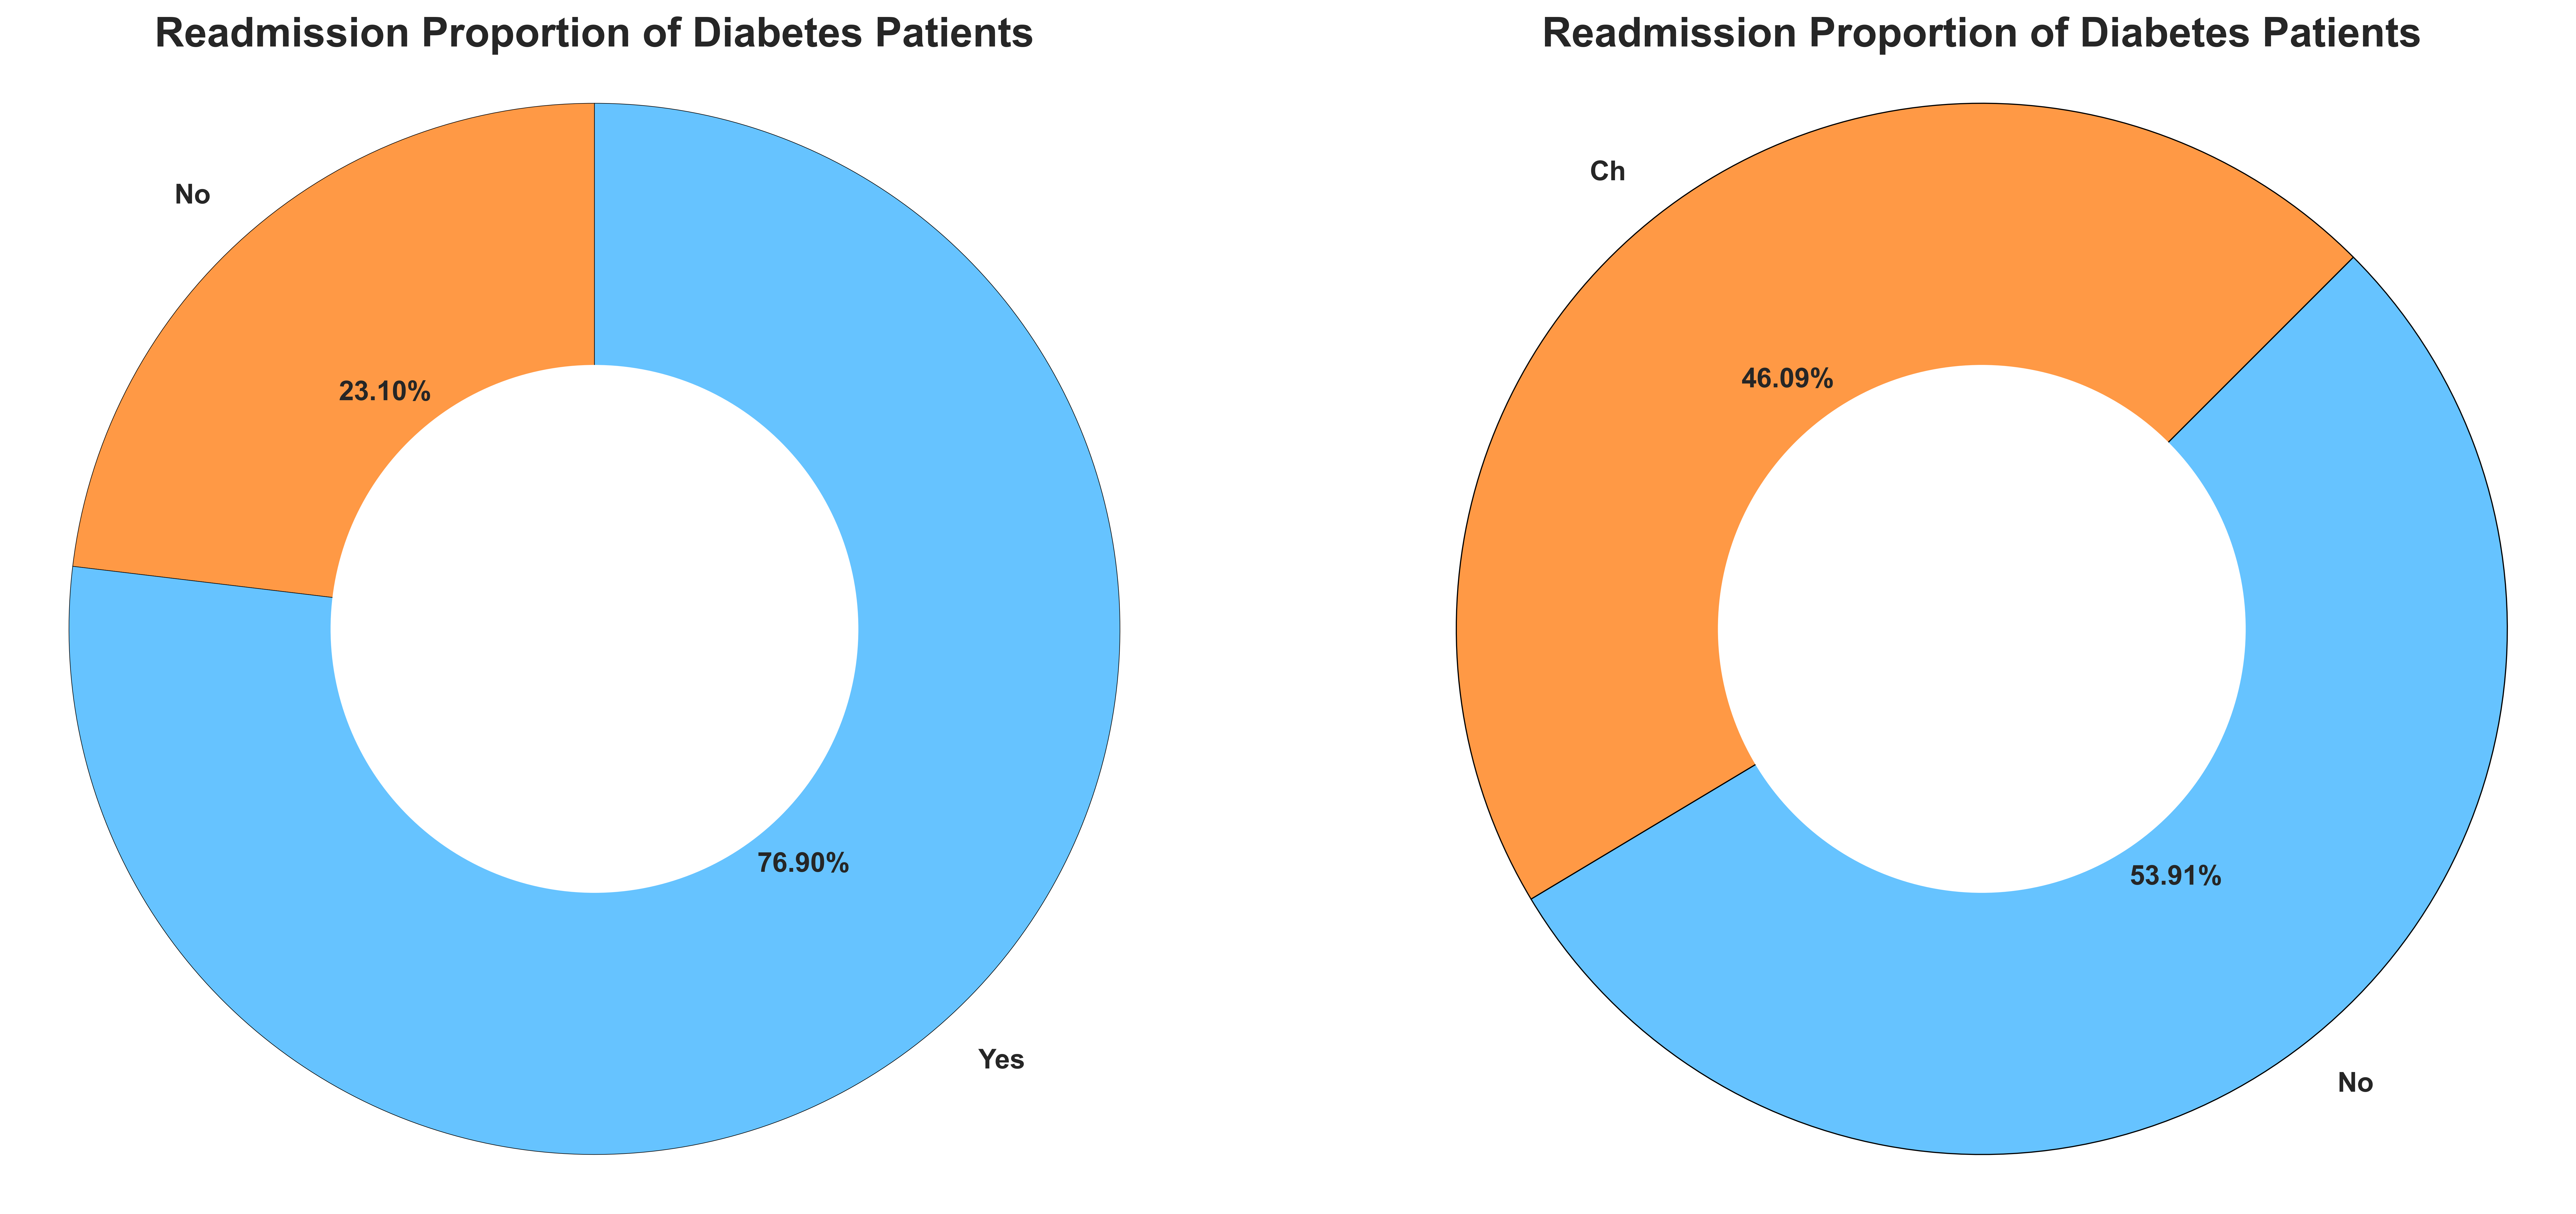

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [41]:
# Diabetes and Readmissions 

diab_readmitted = df_staged.groupby(['diabetesMed'])['readmitted'].count().round(decimals = 3).reset_index().sort_values(by = ['diabetesMed'])
diab_change_readmitted = df_staged.groupby(['change'])['readmitted'].count().round(decimals = 3).reset_index().sort_values(by = ['change'])
diab_readmitted

#1 pie chart:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, dpi = 600)
labels = diab_readmitted['diabetesMed']
values = diab_readmitted['readmitted']

plt.figure(figsize=(4,4))
diab_readmitted= ax1.pie(values, labels=labels, autopct='%1.2f%%', 
                         colors=['#ff9945','#66c3ff'], startangle =90,
                         wedgeprops={'linewidth': .25, 'edgecolor': 'black'},
                         textprops={'size': 12,'fontweight': 'bold'})

# Adding a white circle at the center of the second pie chart
centre_circle1 = plt.Circle((0, 0), 0.5, fc='white')
ax1.add_artist(centre_circle1)

ax1.axis('equal') 
ax1.set_title('Readmission Proportion of Diabetes Patients', size = 18,fontweight = 'bold')


# 2 pie chart
label = diab_change_readmitted['change']
value = diab_change_readmitted['readmitted']

plt.figure(figsize=(4,4))
diab_change= ax2.pie(value, labels=label, autopct='%1.2f%%', 
                     colors=['#ff9945','#66c3ff'], startangle =45,
                     wedgeprops={'linewidth': .5, 'edgecolor': 'black'},
                     textprops={'size': 12,'fontweight': 'bold'})

# Adding a white circle at the center of the second pie chart
centre_circle2 = plt.Circle((0, 0), 0.5, fc='white')
ax2.add_artist(centre_circle2)

ax2.axis('equal') 
ax2.set_title('Readmission Proportion of Diabetes Patients', size = 18, fontweight = 'bold')





plt.tight_layout()
plt.show()

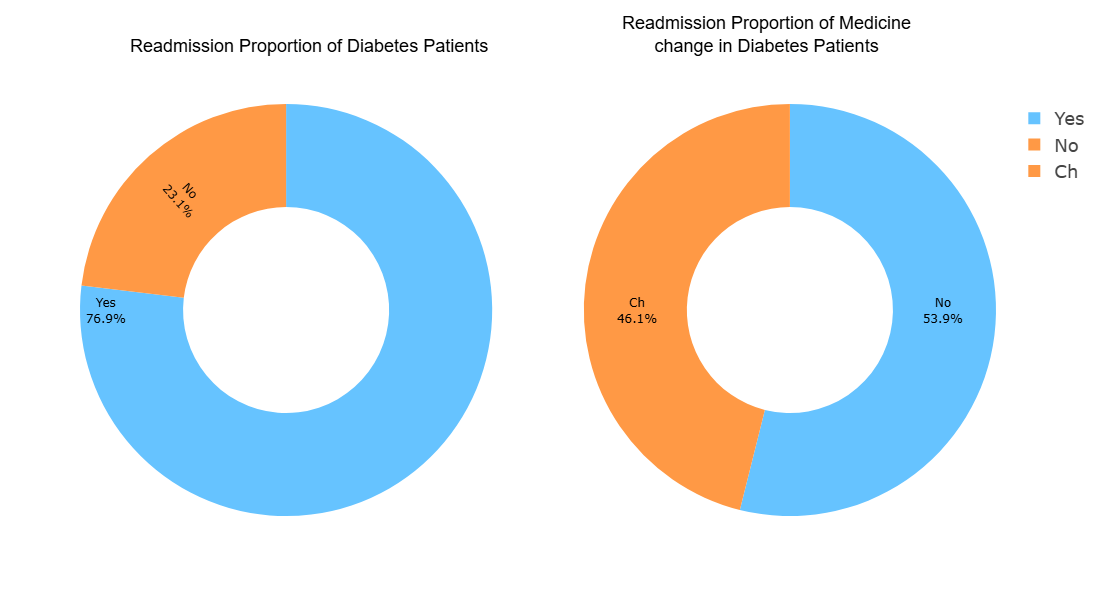

In [42]:
diab_readmitted = df_staged.groupby(['diabetesMed'])['readmitted'].count().round(decimals=3).reset_index().sort_values(by=['diabetesMed'])
diab_change_readmitted = df_staged.groupby(['change'])['readmitted'].count().round(decimals=3).reset_index().sort_values(by=['change'])

# Create subplot figure
fig = ps.make_subplots(rows=1, cols=2, subplot_titles=('Readmission Proportion of Diabetes Patients', 
                                                    'Readmission Proportion of Diabetes Patients'), 
                                                     specs=[[{'type': 'pie'}, {'type': 'pie'}]])

# Pie chart 1
fig.add_trace(go.Pie(
    labels=diab_readmitted['diabetesMed'],
    values=diab_readmitted['readmitted'],
    hole=0.5,  # This makes it a donut chart
    marker=dict(colors=['#ff9945', '#66c3ff']),
    textinfo='label+percent',
    insidetextorientation='radial',
    textfont=dict(size=12, color='black')
), row=1, col=1)

# Pie chart 2
fig.add_trace(go.Pie(
    labels=diab_change_readmitted['change'],
    values=diab_change_readmitted['readmitted'],
    hole=0.5,  # This makes it a donut chart
    marker=dict(colors=['#ff9945', '#66c3ff']),
    textinfo='label+percent',
    insidetextorientation='radial',
    textfont=dict(size=12, color='black')
), row=1, col=2)

# Update layout with bold titles
fig.update_layout(
    template='presentation',
    width=1200,
    height=600,  
    annotations=[
        dict(
            x=0.25,
            y=1.1,
            text='Readmission Proportion of Diabetes Patients',
            font=dict(size=18, color='black', family='Arial')
        ),
        dict(
            x=0.75,
            y=1.1,
            text='Readmission Proportion of Medicine<br>change in Diabetes Patients',
            font=dict(size=18, color='black', family='Arial')
        )
    ]
)

# Show the plot
fig.show()


### Exporting Data

In [50]:
# Exporting Cleaned data into a csv file:
# Define the local file path
file_path = 'D:\Portfolio-Projects\Patient_readmission_project\hospital_admission_data_cleaned.csv'  # Update with your desired path and filename

# Export the DataFrame to a CSV file
df_staged.to_csv(file_path, index=False)

print(f"DataFrame has been exported to {file_path}")
print(f'{df_staged}')

DataFrame has been exported to D:\Portfolio-Projects\Patient_readmission_project\hospital_admission_data_cleaned.csv
       index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754            Other  Female  [80-90)   
66586  51312     153167502    81985473        C

### Insights and Suggestions

Based on Exploratory Data Analysis, Followings Insights are gained:

1. People between age Group of 60-80 Readmitted more than any other Age group People.
2. Caucasian Women readmitted more than any other race followed closely by Caucasion Men.
3. Number of procedures is inversely proportionate to readmission rate.
4. At 8 to 10 diagnoses shows increase in readmission and Medications between 10 - 20 shows same increase in readmission.
5. Lab procedures from 10 to 25 has reduced readmissions and any thing above and below that range has readmissions higher.
6. Patients tends to stay longer in hospitals for Medical Speciality such as Pediatrics-Pulmonology, PhysicalMedicineandRehabilitation, OutreachServices
7. Patients tends to stay shorter in hospitals for Medical Speciality such as Pediatrics-EmergencyMedicine, Anesthesiology-Pediatric.
8. 76% of readmissions are due to diabetic patients and change in Medicine brings the readmission down to 46%.

Some of the suggestions are as follows:

1. For diabetic patients, Maintaining 6 to 8 diagnoses and change in medications may bring down the readmissions.
2. Caucasian race people needs to be diagnosed properly with increase in procedures reduces readmission, particularly Caucasian women needs more attention
3. Keeping lab Procedures between 10 to 25 and medications between 20 to 30 can reduce readmissions. But not concluded it will be effective.